In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/songsds/dataset.csv


# EDA и начало Feature Engineering

Значение колонок:
- **track_id**: Уникальный идентификатор Spotify для каждого трека;
- **artists**: имена исполнителей, исполнивших трек, разделенные символом ";";
- **album_name**: Название альбома, в котором появляется трек;
- **track_name**: Название трека;
- **popularity**: значение в диапазоне от 0 до 100, указывающее на популярность трека, основанную на последних прослушиваниях;
- **duration_ms**: длина трека в миллисекундах;
- **explicit**: Логическое значение, указывающее, содержит ли трек явный контент;
- **danceability**: Описывает, насколько трек подходит для танцев (0.0 = наименее танцевальный, 1.0 = наиболее танцевальный);
- **energy**: Представляет интенсивность и насыщенность трека (0,0 = низкая энергия, 1,0 = высокая энергия);
- **key**: Музыкальная тональность трека, отображаемая с использованием стандартной нотной записи;
- **loudness**: Общая громкость трека в децибелах (дБ);
- **mode**: Указывает на модальность (мажорную или минорную) трека;
- **speechiness**: определяет наличие произносимых слов в треке;
- **acousticness**: показатель достоверности того, является ли трек акустическим (0,0 = не является акустическим, 1,0 = хорошо слышен);
- **instrumentalness**: определяет, содержит ли трек вокал (0.0 = содержит вокал, 1.0 = инструментальный);
- **liveness**: определяет присутствие аудитории при записи (0,0 = студийная запись, 1,0 = живое исполнение);
- **valence**: Измеряет музыкальную позитивность, передаваемую треком (0,0 = негативная, 1,0 = положительная);
- **tempo**: Предполагаемый темп трека в ударах в минуту (BPM);
- **time_signature**: Предполагаемый временной интервал трека (от 3 до 7).трека (от 3 до 7).

In [3]:
df = pd.read_csv('/kaggle/input/songsds/dataset.csv')
df.head(15)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
5,5,01MVOl9KtVTNfFiBU9I7dc,Tyrone Wells,Days I Will Remember,Days I Will Remember,58,214240,False,0.688,0.4810,...,-8.807,1,0.1050,0.2890,0.000000,0.1890,0.6660,98.017,4,acoustic
6,6,6Vc5wAMmXdKIAM7WUoEb7N,A Great Big World;Christina Aguilera,Is There Anybody Out There?,Say Something,74,229400,False,0.407,0.1470,...,-8.822,1,0.0355,0.8570,0.000003,0.0913,0.0765,141.284,3,acoustic
7,7,1EzrEOXmMH3G43AXT1y7pA,Jason Mraz,We Sing. We Dance. We Steal Things.,I'm Yours,80,242946,False,0.703,0.4440,...,-9.331,1,0.0417,0.5590,0.000000,0.0973,0.7120,150.960,4,acoustic
8,8,0IktbUcnAGrvD03AWnz3Q8,Jason Mraz;Colbie Caillat,We Sing. We Dance. We Steal Things.,Lucky,74,189613,False,0.625,0.4140,...,-8.700,1,0.0369,0.2940,0.000000,0.1510,0.6690,130.088,4,acoustic
9,9,7k9GuJYLp2AzqokyEdwEw2,Ross Copperman,Hunger,Hunger,56,205594,False,0.442,0.6320,...,-6.770,1,0.0295,0.4260,0.004190,0.0735,0.1960,78.899,4,acoustic


Посмотрим на то, какие колонки есть в датасете

In [4]:
df.columns

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

Заметим, что в датасете всего лишь три пропущенных значения. Так как датасет довольно-таки большой, ничего страшного, если мы просто дропнем их.

In [5]:
df.isnull().sum()


Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [6]:
df = df.dropna()

Для начала, хотелось бы все значения в колонке duration заменить на минуты.
Сделал я это для того, чтобы уже сейчас значения не были такими большими.

In [7]:
def ms_to_minutes(ms):
    return round(ms/(1000*60), 1)


df['duration_ms'] = df['duration_ms'].apply(ms_to_minutes)


Далее, переименуем колонку, чтобы данные соответствовали названию

In [8]:

df = df.rename(columns={'duration_ms': 'duration_min'})
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_min,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,3.8,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,2.5,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,3.5,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,3.4,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,3.3,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


Нормализуем данные в колонке tempo, так как они тоже большие. Для этого посчитаем общую сумму в колонке и затем
постепенно будем делить значение в каждой ячейке на эту сумму

In [9]:

total_sum = df['tempo'].sum()

def normalize_data(value):
    global total_sum
    return value/total_sum

df['tempo'] = df['tempo'].apply(normalize_data)
df.head()   

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_min,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,3.8,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,0.000006,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,2.5,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,0.000006,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,3.5,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,0.000005,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,3.4,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,0.000013,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,3.3,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,0.000009,4,acoustic


Чтобы убедиться, что все выполнилось корректно, проверим общую сумму в колонке tempo. Должна получиться 1

In [10]:
df['tempo'].sum()

1.0

**Проверим несколько гипотез:**
- danceability и energy - по сути, это почти одно и то же?;
- speechness и instrumentalness - это обратные величины? speechness прогнозирует, что в песне есть текст, 
а instrumentalness - что в песне нет вокала.

Посмотрим на корреляцию. Но перед этим необходимо преобразовать категориальные данные в числовые. Используем для этого именно LabelEncoder, чтобы не создать кучу новых колонок, так как, например, в колонке artists очень много уникальных авторов (ведь сам датасет в 114000 строк).

In [11]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

LE.fit(df['artists'].unique())
df['artists'] = LE.transform(df['artists'])

LE.fit(df['album_name'].unique())
df['album_name'] = LE.transform(df['album_name'])

LE.fit(df['track_name'].unique())
df['track_name'] = LE.transform(df['track_name'])

LE.fit(df['explicit'].unique())
df['explicit'] = LE.transform(df['explicit'])

LE.fit(df['track_genre'].unique())
df['track_genre'] = LE.transform(df['track_genre'])

'''Нужен ли нам track_id? Скорее нет, чем да. Ведь это просто расположение трека на платформе, больше никакой информации
данная колонка не несет. Можно удалить. Также удалим колонку Unnamed: 0 (Возможно, это баг, что она появилась, но
она была с момента загрузки)'''

df = df.drop(['Unnamed: 0', 'track_id'], axis=1)
df

,artists,album_name,track_name,popularity,duration_min,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,10357,8100,11741,73,3.8,0,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,0.000006,4,0
1,3287,14796,22528,55,2.5,0,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,0.000006,4,0
2,12397,39162,60774,57,3.5,0,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,0.000005,4,0
3,14839,8580,9580,71,3.4,0,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,0.000013,3,0
4,5255,16899,25689,82,3.3,0,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,0.000009,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,22486,66,53329,21,6.4,0,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,0.000009,5,113
113996,22486,66,65090,22,6.4,0,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,0.000006,4,113
113997,4952,5028,38207,22,4.5,0,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,0.000010,4,113
113998,18534,7238,21507,41,4.7,0,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,0.000010,4,113


Теперь посмотрим на корреляцию. Саму матрицу строить не будем (построим позже, когда добавим новые признаки), а просто пройдемся по каждой колонке и выведем только те, у которых корреляция > 0.6. Это будет означать, что данные довольно хорошо коррелируют друг с другом.

In [12]:

correlation_table = df.corr()
for column in correlation_table.columns:
    if correlation_table[f'{column}'].nlargest(2).iloc[1] > 0.6:
        print(column)
        


energy
loudness


**Вывод**: Получили, что всего лишь две колонки коррелируют друг с другом > 0.6: energy и loudness

С учетом результатов выше, предлагаю заменить эти две колонки на одну, в которой будут записаны произведение 
значений колонок energy и loudness друг с другом. Я не смог придумать новое название, поэтому новые значения запишем
в существующую колонку energy

In [13]:
df['energy'] = df['energy'] * df['loudness']

In [14]:
df = df.drop(['loudness'], axis=1)

Гипотезы, которые были описаны выше, не подтвердились (по крайней мере, в таблице корреляции они не очень сильно
коррелируют)

# Графики

Теперь к графикам. Построим график, где ось Х - это колонка duration, а ось Y - колонка popularity.
Так, мы увидим зависимость того, насколько зависит длительность трека и его популярность.

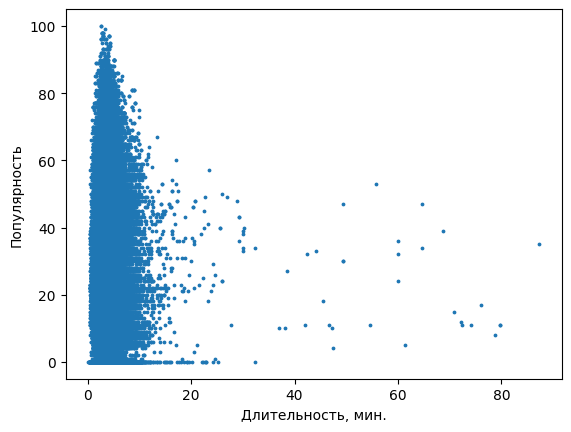

In [15]:
import matplotlib.pyplot as plt

plt.scatter(df['duration_min'], df['popularity'], s=3)
plt.xlabel('Длительность, мин.')
plt.ylabel('Популярность')
plt.show()

**Вывод**: Как можем заметить, песни, продолжительность которых > ~~10 минут не так популярны как те, которые меньше 10 минут. Это позволяет понять основные предпочтения аудитории по длительности треков.

На основе этого графика можем добавить новый столбец - отношение популярности к длительности музыки. Соответственно,
получившиеся значения будут тем больше, чем больше популярность и чем меньше длительность.


In [16]:
df['pop_duration_ratio'] = df['popularity'] / df['duration_min']

Проверим, какой **жанр** треков пользуется большей **популярностью**. Для этого посчитаем значение суммарной популярности
для каждого жанра и построим график. Так как я уже закодировал треки при помощи *labelencoder*, скачаю датасет снова, чтобы было удобнее (будет видно название жанра, а не номер).

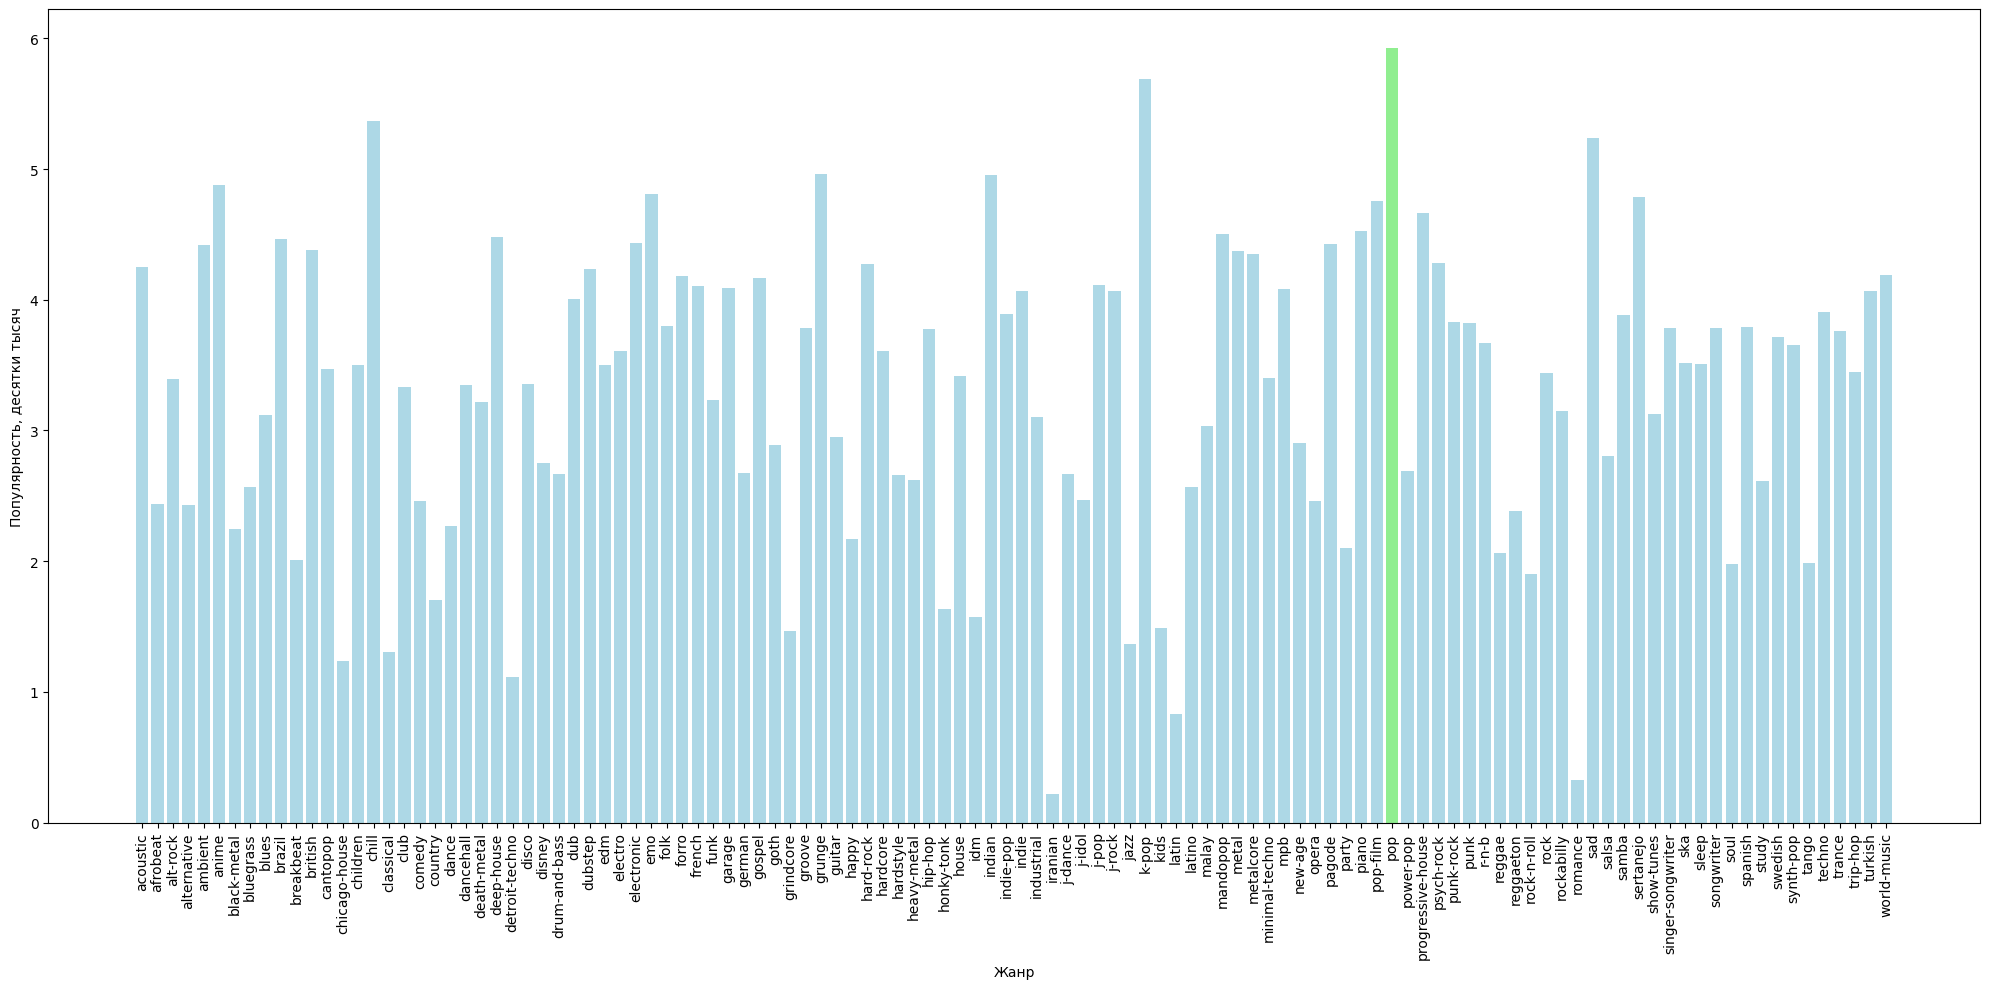

In [17]:

def fix_values(value):
    return value/10000

temporary_df = pd.read_csv('/kaggle/input/songsds/dataset.csv')

popularity_per_genre = list(temporary_df.groupby('track_genre')['popularity'].sum()) # Популярность по жанрам

for i in range(len(popularity_per_genre)):
    popularity_per_genre[i] = fix_values(popularity_per_genre[i])

genres = list(temporary_df['track_genre'].unique()) # Сами жанры
top_indices = popularity_per_genre.index(max(popularity_per_genre))

colors = ['lightblue'] * len(popularity_per_genre)
colors[top_indices] = 'lightgreen'

plt.figure(figsize=(20,10))

plt.bar(genres, popularity_per_genre, color=colors)

plt.xlabel('Жанр')
plt.ylabel('Популярность, десятки тысяч')
plt.xticks(rotation=90)
plt.subplots_adjust(bottom=0.2)
plt.tight_layout()
plt.show()


**Вывод**: Как видим, очевидная проблема данного графика - данных слишком много, из-за чего плохо видно статистику. Поэтому, создадим словарь, отсортируем по значениям и выведем топ-5 по популярности и антитоп-5. Однако можно сразу отметить, что жанр pop - победитель.

In [18]:
popularity_dict = dict(zip(genres, popularity_per_genre))
popularity_dict = dict(sorted(popularity_dict.items(), key=lambda item: item[1], reverse=True))
import itertools

print('Популярные:')

for key, value in itertools.islice(popularity_dict.items(), 5):
  print(f'Жанр: {key}, Популярность: {value}')

popularity_dict = dict(sorted(popularity_dict.items(), key=lambda item: item[1], reverse=False))

print('Самые непопулярные:')

for key, value in itertools.islice(popularity_dict.items(), 5):
  print(f'Жанр: {key}, Популярность: {value}')

Популярные:
Жанр: pop, Популярность: 5.9283
Жанр: k-pop, Популярность: 5.6896
Жанр: chill, Популярность: 5.3651
Жанр: sad, Популярность: 5.2379
Жанр: grunge, Популярность: 4.9594
Самые непопулярные:
Жанр: iranian, Популярность: 0.221
Жанр: romance, Популярность: 0.3245
Жанр: latin, Популярность: 0.8297
Жанр: detroit-techno, Популярность: 1.1174
Жанр: chicago-house, Популярность: 1.2339


**Второй вывод**: Теперь мы знаем самые популярные жанры, что может помочь в дальнейшем при составлении каких-либо признаков.

Есть очень интересная характеристика у музыки - **valence**. Она показывает, передает ли трек положительные эмоции или он
негативный/депрессивный. Проверим, насколько такие треки пользуются популярностью. Будем считать, что трек **положительный**, если его значение в этой ячейке больше 0.3. Иначе - **негативный**.

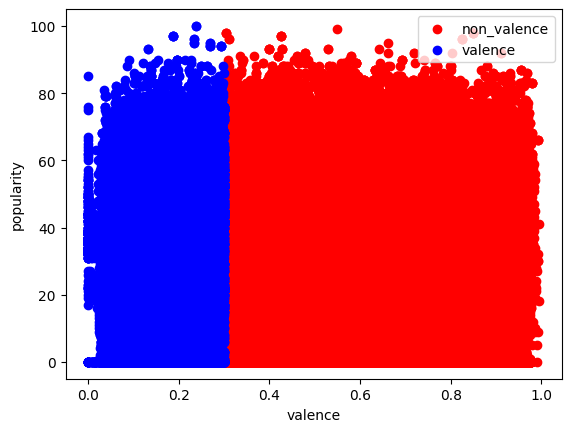

In [19]:
non_valence = df[df['valence'] > 0.3]
valence = df[df['valence'] <= 0.3]

plt.scatter(non_valence['valence'], non_valence['popularity'], c='red', label='non_valence') 
plt.scatter(valence['valence'], valence['popularity'], c='blue', label='valence') 

plt.legend()

plt.xlabel('valence')
plt.ylabel('popularity')

plt.show()

**Вывод**: По графику видно, что в целом, неважно, насколько песня позитивная или негативная, все они одинаково пользуются популярностью у аудитории.

Проверим, какой жанр музыки популярен среди самых прослушиваемых авторов. Возьмем топ-10.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Rammstein'),
  Text(1, 0, 'CoComelon'),
  Text(2, 0, 'Red Hot Chili Peppers'),
  Text(3, 0, 'Charlie Brown Jr.'),
  Text(4, 0, 'Arctic Monkeys'),
  Text(5, 0, 'Elvis Presley'),
  Text(6, 0, 'Prateek Kuhad'),
  Text(7, 0, 'BTS'),
  Text(8, 0, 'Linkin Park'),
  Text(9, 0, 'The Beatles')])

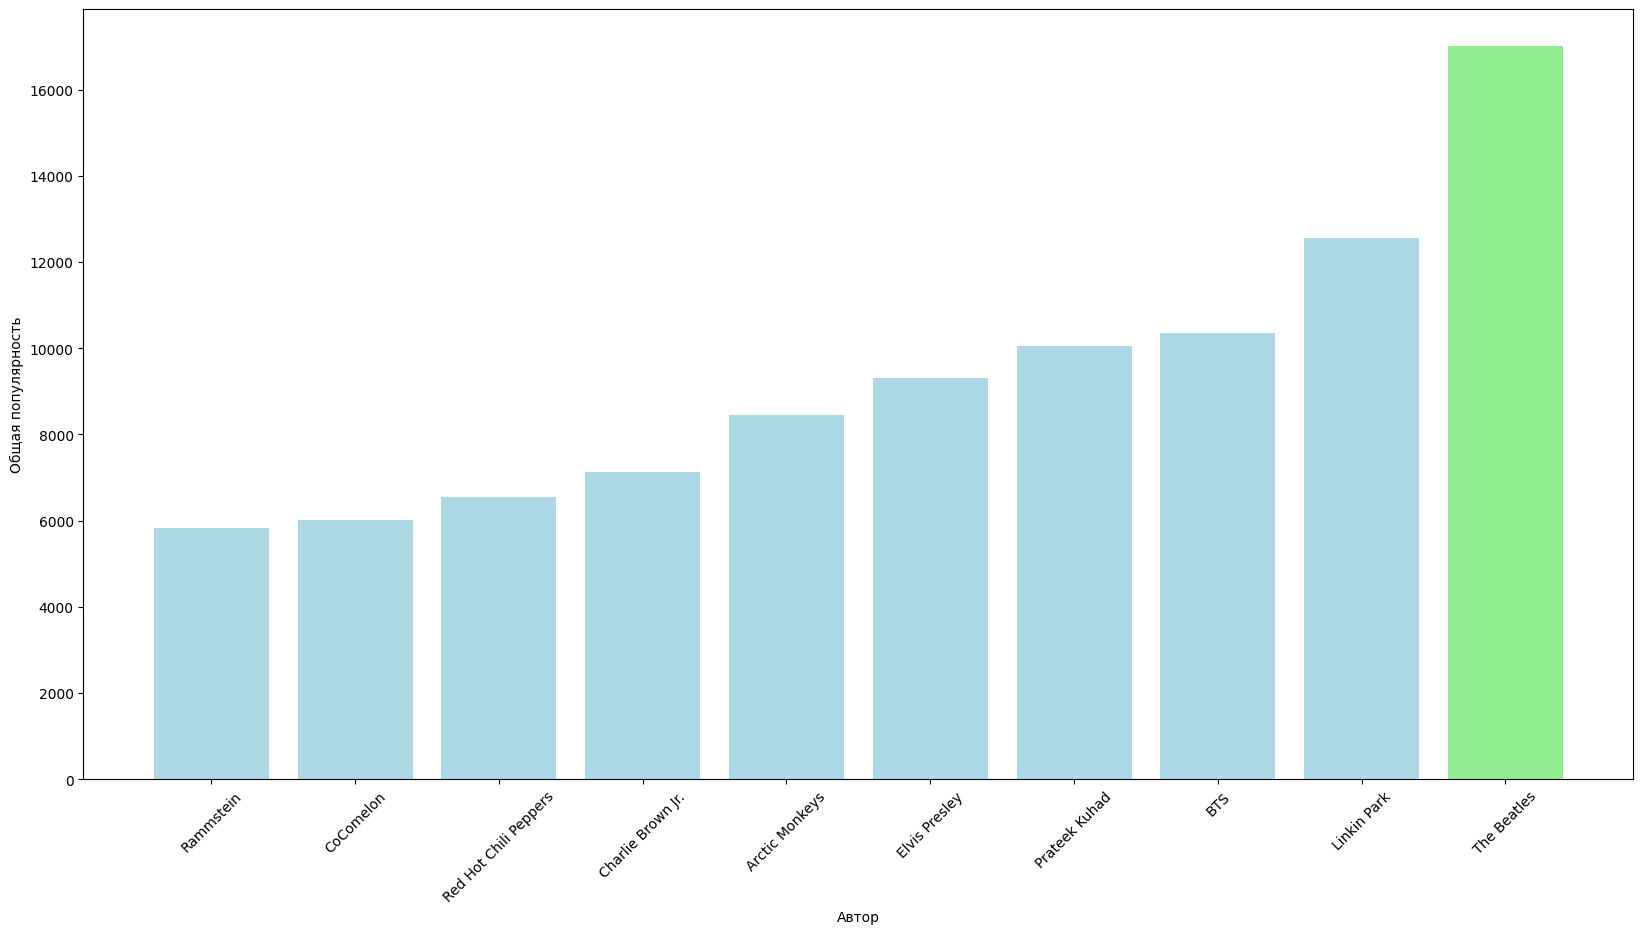

In [20]:
popular_artists = temporary_df.groupby('artists')['popularity'].sum()
top_10 = pd.DataFrame(popular_artists.sort_values().tail(10))

colors = ['lightblue'] * (len(top_10))
colors[-1] = 'lightgreen'

plt.figure(figsize=(20,10))



plt.bar(list(top_10.index), list(top_10.popularity), color=colors) # Построим график топ-10 авторов по популярности



plt.xlabel('Автор')
plt.ylabel('Общая популярность')
plt.xticks(rotation=45)

**Первый вывод**: теперь мы знаем самых популярных авторов (группы). Это позволяет увидеть общий интерес аудитории к различным жанрам музыки, ведь авторы (группы) обычно исполняют свои песни в определенных жанрах.

Теперь вернемся к вопросу о том, какие жанры популярны среди топ-10 авторов.

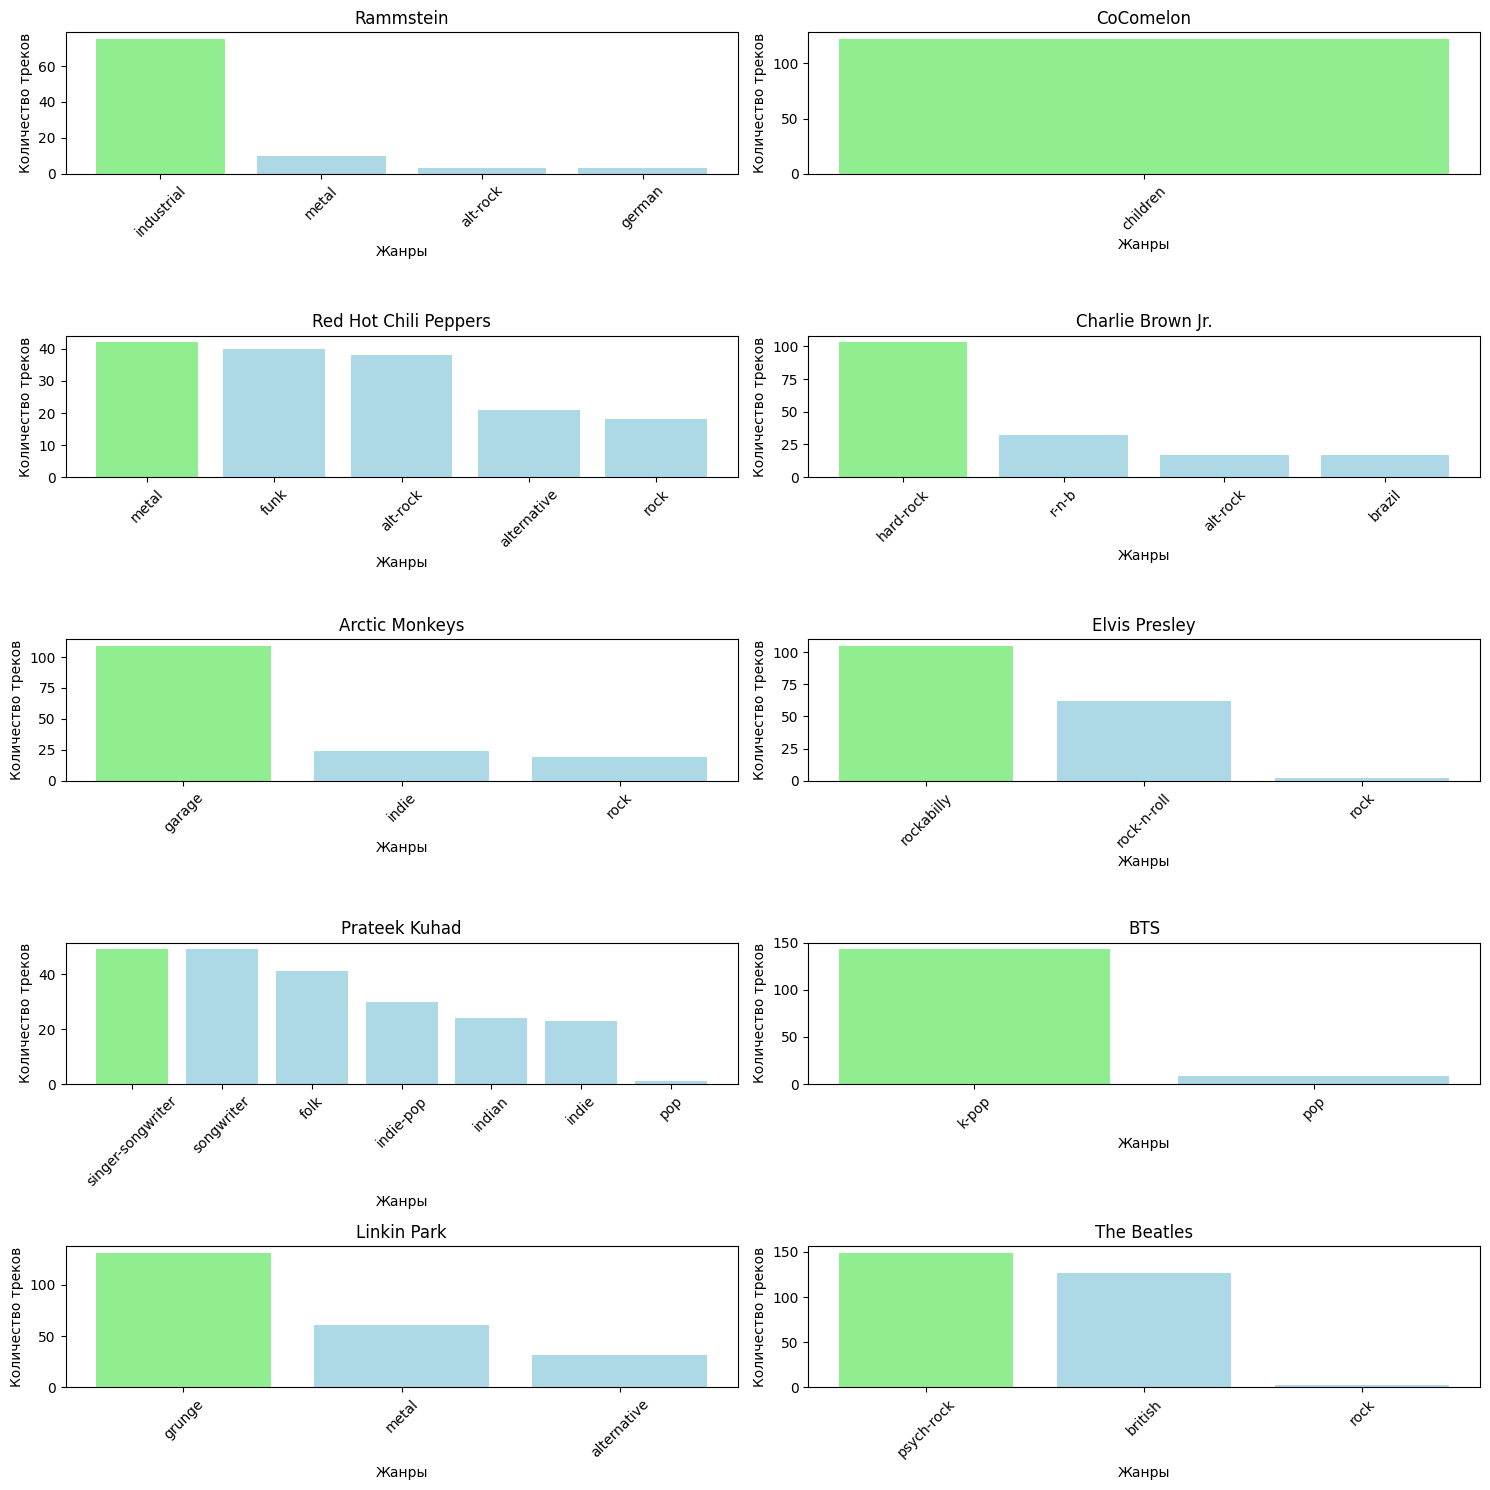

In [21]:
top_10_names = list(top_10.index)

popular_genres_among_top10 = []

for name in top_10_names:
    popular_genres_among_top10.append(temporary_df[temporary_df['artists'] == f'{name}']['track_genre'].value_counts())

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))
axes = axes.flatten()

for i, name in enumerate(top_10_names):
    artist_df = temporary_df[temporary_df['artists'] == name]
    genre_counts = artist_df['track_genre'].value_counts()

    top_genre_index = genre_counts.idxmax()

    colors = ['lightblue'] * len(genre_counts) 
    colors[genre_counts.index.get_loc(top_genre_index)] = 'lightgreen'

    axes[i].bar(genre_counts.index, genre_counts.values, color=colors)
    axes[i].set_title(f'{name}')
    axes[i].set_xlabel('Жанры')
    axes[i].set_ylabel('Количество треков')
    axes[i].tick_params(axis='x', rotation=45) 

plt.tight_layout()
plt.show()

**Второй вывод**: Благодаря этим графикам становится понятно, какие жанры являются популярными у топ-10 авторов (групп).

Построим график количества песен с explicit-контентом и без.

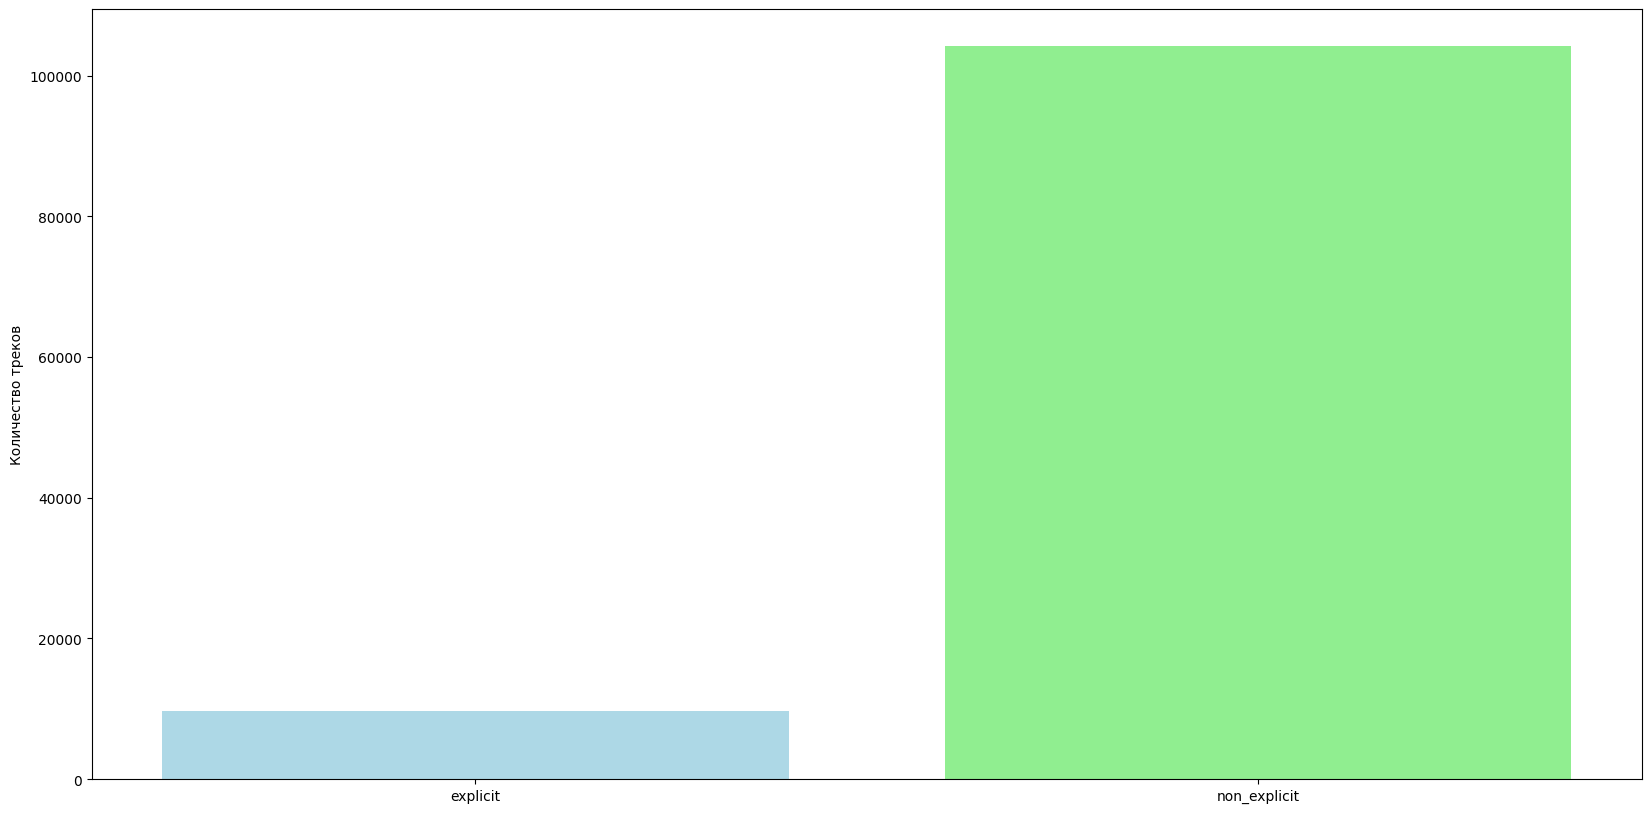

In [22]:
explicit = df['explicit'].sum()
non_explicit = df.shape[0] - explicit

colors = ['lightblue', 'lightblue']
if explicit > non_explicit:
    colors[0] = 'lightgreen'
else:
    colors[1] = 'lightgreen'
    
plt.figure(figsize=(20, 10))
plt.bar(['explicit', 'non_explicit'], [explicit, non_explicit], color=colors)
plt.ylabel('Количество треков')
plt.show()

**Вывод**: Можно заметить, что большинство песен - без explicit-контента. Это может означать, что, например, исполнители больше стараются выпускать песен без откровенного контента, так как, возможно, аудитории такие не очень нравятся.

Проверим гипотезу, которую я описал выше в выводе. Для этого предлагаю просто посмотреть на то, какая популярность у песен с explicit-контентом.

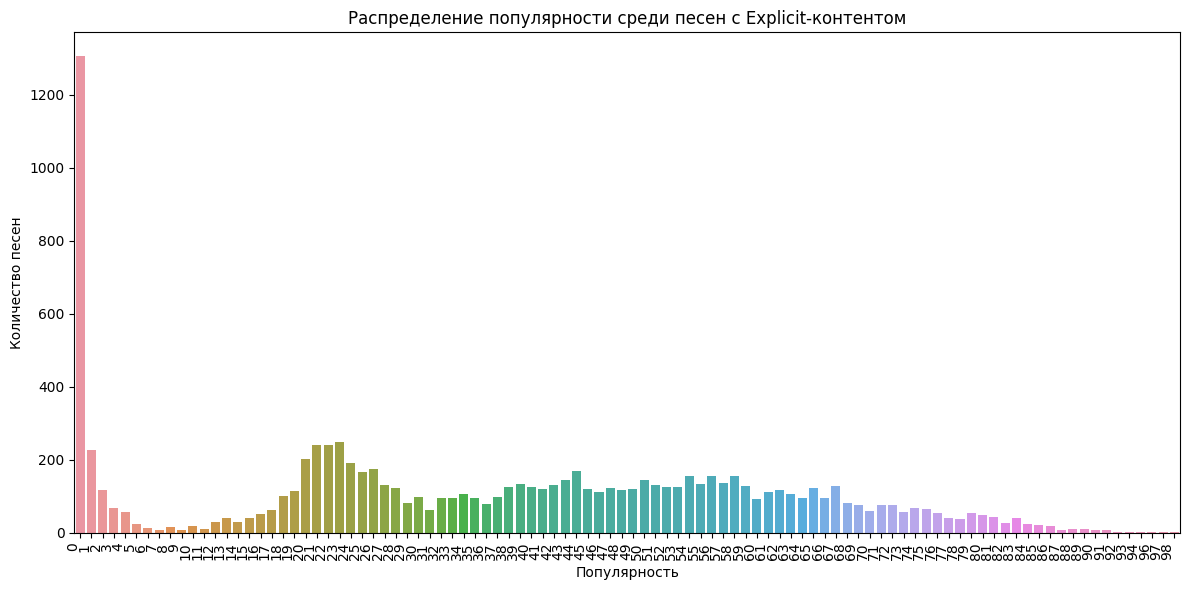

In [23]:
import seaborn as sns

explicit_songs = df[df['explicit'] == 1]

plt.figure(figsize=(12, 6))
sns.countplot(x='popularity', data=explicit_songs, order=sorted(explicit_songs['popularity'].unique()))
plt.xlabel("Популярность")
plt.ylabel("Количество песен")
plt.title("Распределение популярности среди песен с Explicit-контентом")
plt.xticks(rotation=90, ha="right")
plt.tight_layout()
plt.show()

**Вывод**: действительно, можно заметить, что в большинстве своем, такие песни не пользуются популярностью. Следовательно, аудитории не очень нравятся такие песни.

Проверим, какие жанры музыки имеют наибольший **danceability**, **energy** и **liveness**. Возьмем топ-5 из каждой категории.

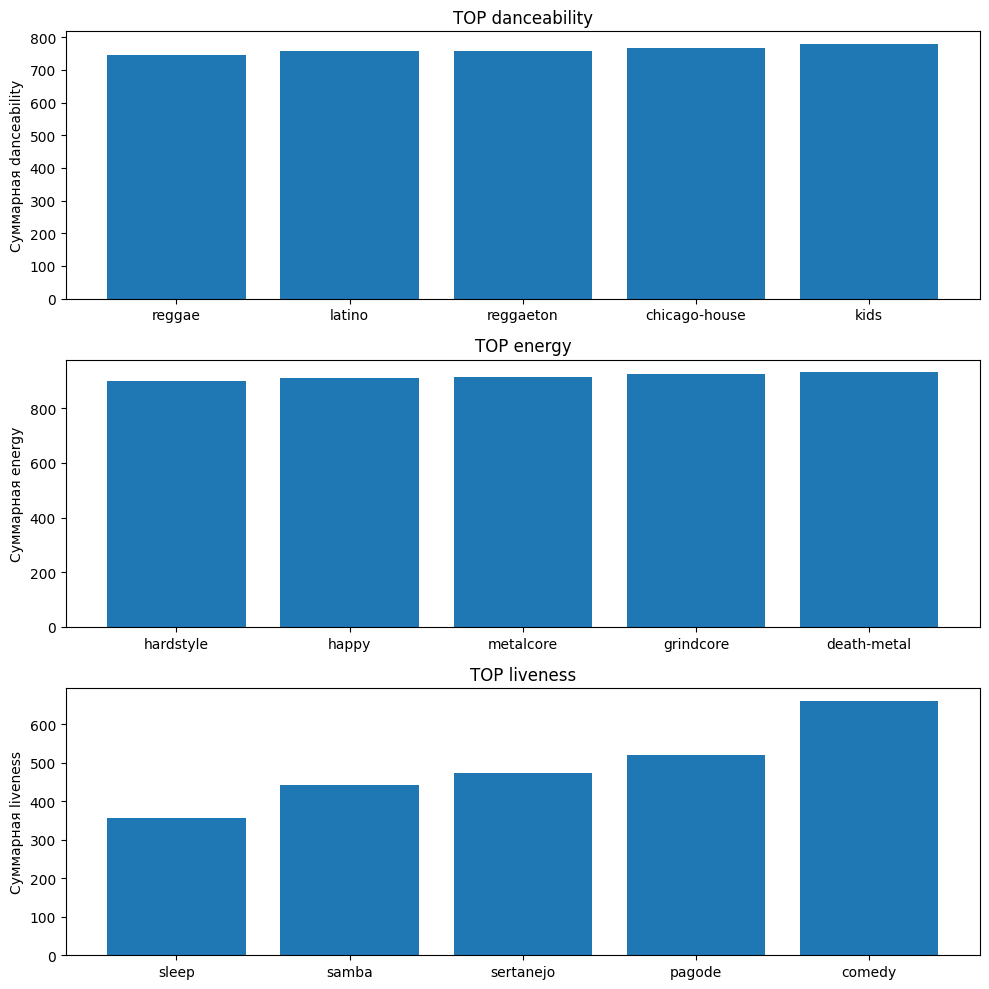

In [24]:

danceability_genres = temporary_df.groupby('track_genre')['danceability'].sum().sort_values().tail()
energy_genres = temporary_df.groupby('track_genre')['energy'].sum().sort_values().tail()
liveness_genres = temporary_df.groupby('track_genre')['liveness'].sum().sort_values().tail()

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 10))
axes = axes.flatten()

axes[0].bar(danceability_genres.index, danceability_genres.values)
axes[0].set_title(f'TOP danceability')
axes[0].set_ylabel('Суммарная danceability')

axes[1].bar(energy_genres.index, energy_genres.values)
axes[1].set_title(f'TOP energy')
axes[1].set_ylabel('Суммарная energy')

axes[2].bar(liveness_genres.index, liveness_genres.values)
axes[2].set_title(f'TOP liveness')
axes[2].set_ylabel('Суммарная liveness')

plt.tight_layout()
plt.show()

**Первый вывод**: По графикам выше можно сделать вывод, что нужно увеличить выборку (взять топ 20) для danceability и energy.
Потому что в liveness можно заметить, что жанры музыки довольно-таки сильно различаются между собой, а у danceability и energy так сказать нельзя (они все примерно на одном уровне).

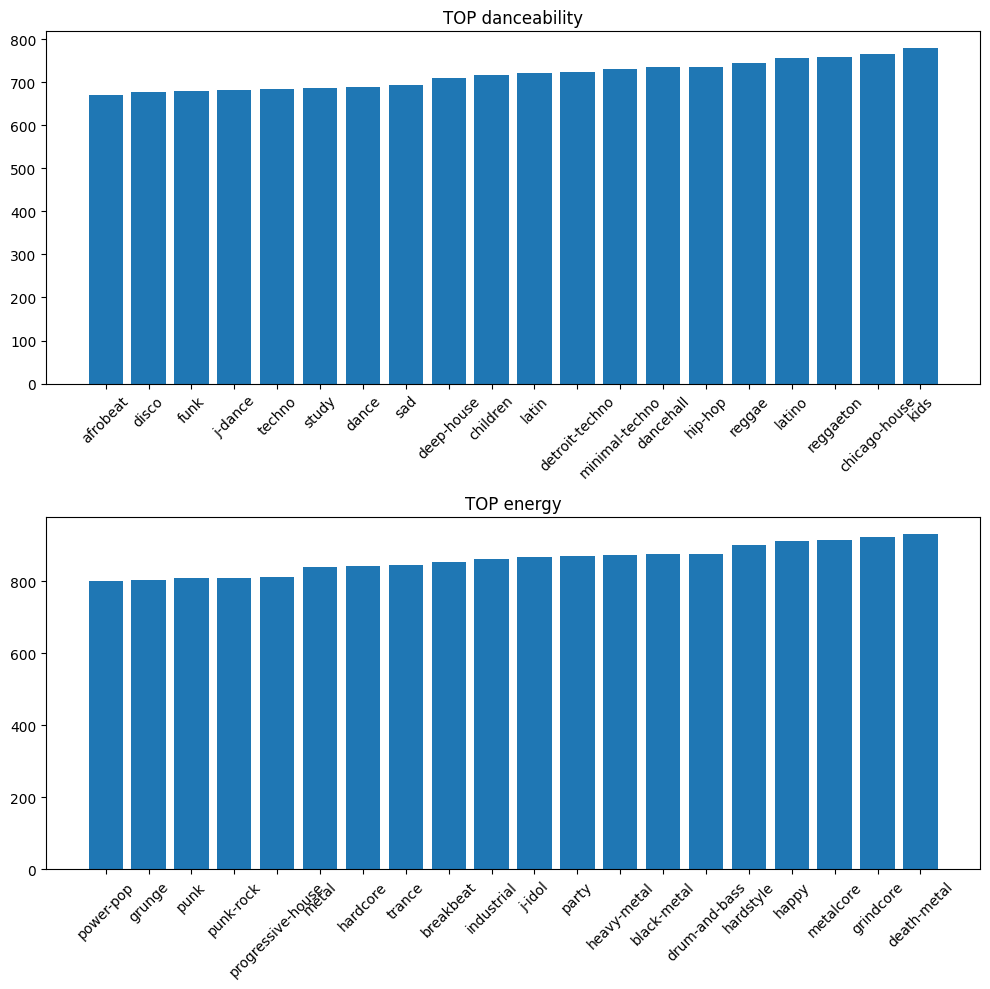

In [25]:
danceability_genres = temporary_df.groupby('track_genre')['danceability'].sum().sort_values().tail(20)
energy_genres = temporary_df.groupby('track_genre')['energy'].sum().sort_values().tail(20)
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))
axes = axes.flatten()

axes[0].bar(danceability_genres.index, danceability_genres.values)
axes[0].set_title(f'TOP danceability')

for tick in axes[0].get_xticklabels():
    tick.set_rotation(45)

axes[1].bar(energy_genres.index, energy_genres.values)
axes[1].set_title(f'TOP energy')

for tick in axes[1].get_xticklabels():
    tick.set_rotation(45)

plt.tight_layout()
plt.show()

В общем, это не очень сильно помогло. Посмотрим тогда на те жанры, у которых danceability и energy наименьший. Можно **предположить**, что эти характеристики не очень сильно влияют на популярность песен, ведь они весьма высоки у многих жанров.

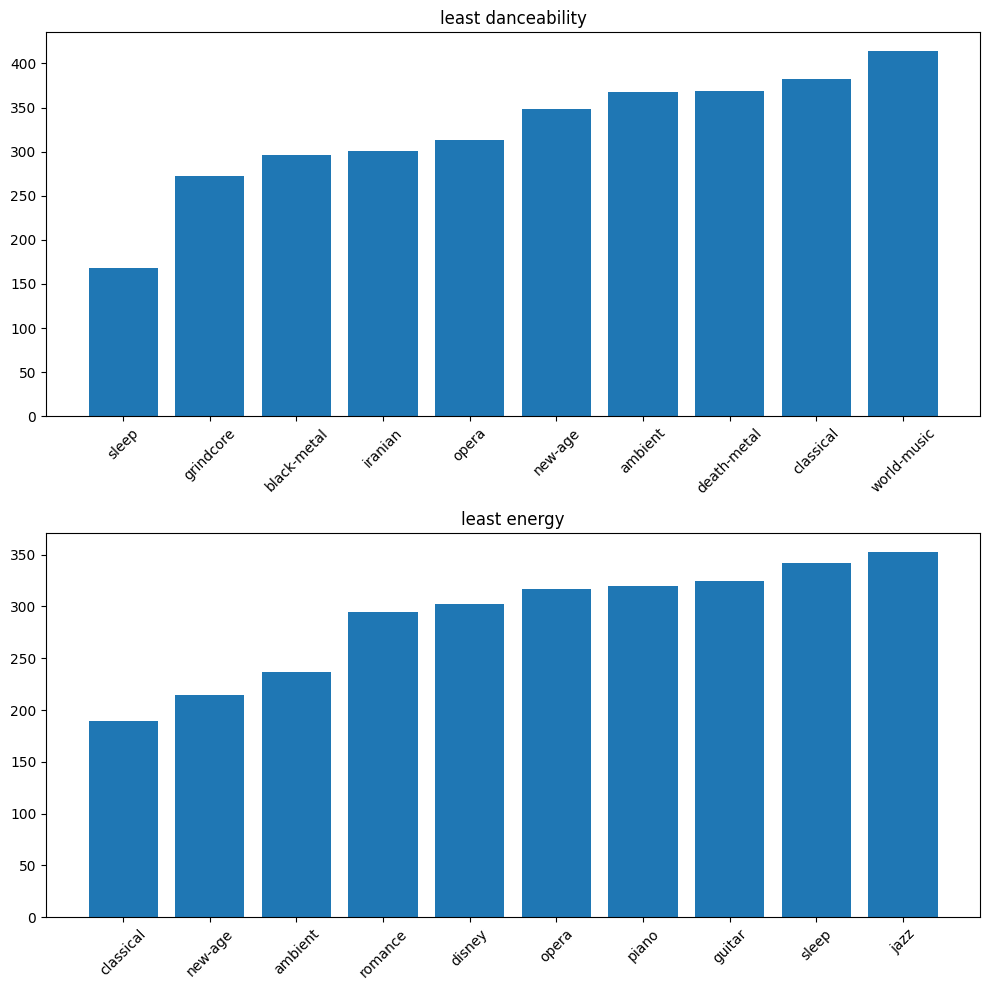

In [26]:

danceability_genres = temporary_df.groupby('track_genre')['danceability'].sum().sort_values().head(10)
energy_genres = temporary_df.groupby('track_genre')['energy'].sum().sort_values().head(10)
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))
axes = axes.flatten()

axes[0].bar(danceability_genres.index, danceability_genres.values)
axes[0].set_title(f'least danceability')

for tick in axes[0].get_xticklabels():
    tick.set_rotation(45)

axes[1].bar(energy_genres.index, energy_genres.values)
axes[1].set_title(f'least energy')

for tick in axes[1].get_xticklabels():
    tick.set_rotation(45)

plt.tight_layout()
plt.show()

**Общий вывод**: графики выше дают нам полное представление о том, какие жанры музыки являются наиболее/наименее популярными. Они отражают основные предпочтения аудитории.

Я решил поменять то, как я считаю значения в колонке tempo. Потому что сейчас они получаются очень маленькими, поэтому буду считать каждое значение, поделив его на максимальное значение в колонке.

In [27]:
max_elem = temporary_df['tempo'].max()

df['tempo'] = temporary_df['tempo'] / max_elem

Сделаю то же самое для колонки popularity, считая, что значение не превосходит 100.

In [28]:
max_elem = temporary_df['popularity'].max()

df['popularity'] = temporary_df['popularity'] / max_elem
df

,artists,album_name,track_name,popularity,duration_min,explicit,danceability,energy,key,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,pop_duration_ratio
0,10357,8100,11741,0.73,3.8,0,0.676,-3.109906,1,0,0.1430,0.0322,0.000001,0.3580,0.7150,0.361245,4,0,19.210526
1,3287,14796,22528,0.55,2.5,0,0.420,-2.861010,1,1,0.0763,0.9240,0.000006,0.1010,0.2670,0.318397,4,0,22.000000
2,12397,39162,60774,0.57,3.5,0,0.438,-3.494506,0,1,0.0557,0.2100,0.000000,0.1170,0.1200,0.313643,4,0,16.285714
3,14839,8580,9580,0.71,3.4,0,0.266,-1.103494,0,1,0.0363,0.9050,0.000071,0.1320,0.1430,0.746758,3,0,20.882353
4,5255,16899,25689,0.82,3.3,0,0.618,-4.288683,2,1,0.0526,0.4690,0.000000,0.0829,0.1670,0.492863,4,0,24.848485
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,22486,66,53329,0.21,6.4,0,0.172,-3.852355,5,1,0.0422,0.6400,0.928000,0.0863,0.0339,0.517705,5,113,3.281250
113996,22486,66,65090,0.22,6.4,0,0.174,-2.143206,0,0,0.0401,0.9940,0.976000,0.1050,0.0350,0.350242,4,113,3.437500
113997,4952,5028,38207,0.22,4.5,0,0.629,-3.584455,0,0,0.0420,0.8670,0.000000,0.0839,0.7430,0.543933,4,113,4.888889
113998,18534,7238,21507,0.41,4.7,0,0.587,-5.509834,7,1,0.0297,0.3810,0.000000,0.2700,0.4130,0.558651,4,113,8.723404


Подводя итоги EDA хочу отметить важные замечания:
- В целом, песни, чья продолжительность меньше 10 минут, пользуются большей популярностью, чем те песни, которые длятся дольше;
- Следующие жанры пользуются наибольшей популярностью: **pop**, Популярность: 5.9283, **k-pop**, Популярность: 5.6896, **chill**, Популярность: 5.3651, **sad**, Популярность: 5.2379, **grunge**, Популярность: 4.9594;
- Нет разницы в том, насколько песня положительная или негативная/депрессивная;
- The Beatles - группа, которая пользуется наибольшей популярностью (с большим отрывом), их любимый жанр - **psych-rock**. Что интересно, он не входит в топ-5 по популярности жанров;
- Гораздо больше песен с non_explicit контентом, и притом, от этого не зависит valence;
- energy и loudness сильно коррелируют между собой;
- danceability и energy имеют большое значение у многих жанров. Возможно, из-за этого они не так сильно влияют на популярность трека;
- песни с Explicit-контентом не очень популярны среди слушателей.


Подводя итоги начального Feature Engineering на основе EDA:
- Добавлена новая колонка pop_duration_ratio - отношение популярности к длительности песен;
- Все значения, которые сильно отличаются от других, были нормализованы;
- колонки energy и loudness были заменены одной колонкой energy (в нее записано произведение energy на loudness).9594

# Конец Feature Engineering и выбор модели.

Перед началом работы с моделями, удалим колонку pop_duration_ratio, так как она, по сути, содержит информацию про колонку
popularity, а это как раз то, что мы стараемся предсказать с помощью модели (выяснили на паре).

In [29]:
df = df.drop(['pop_duration_ratio'], axis=1)

Исходя из того, что мы удалили колонку, предлагаю еще проанализировать некоторые данные из датасета (поэтому этот раздел и называется "**Конец Feature Engineering** и выбор модели."

Я решил проанализировать распределение значения колонок, отвечающих за характеристику песен.

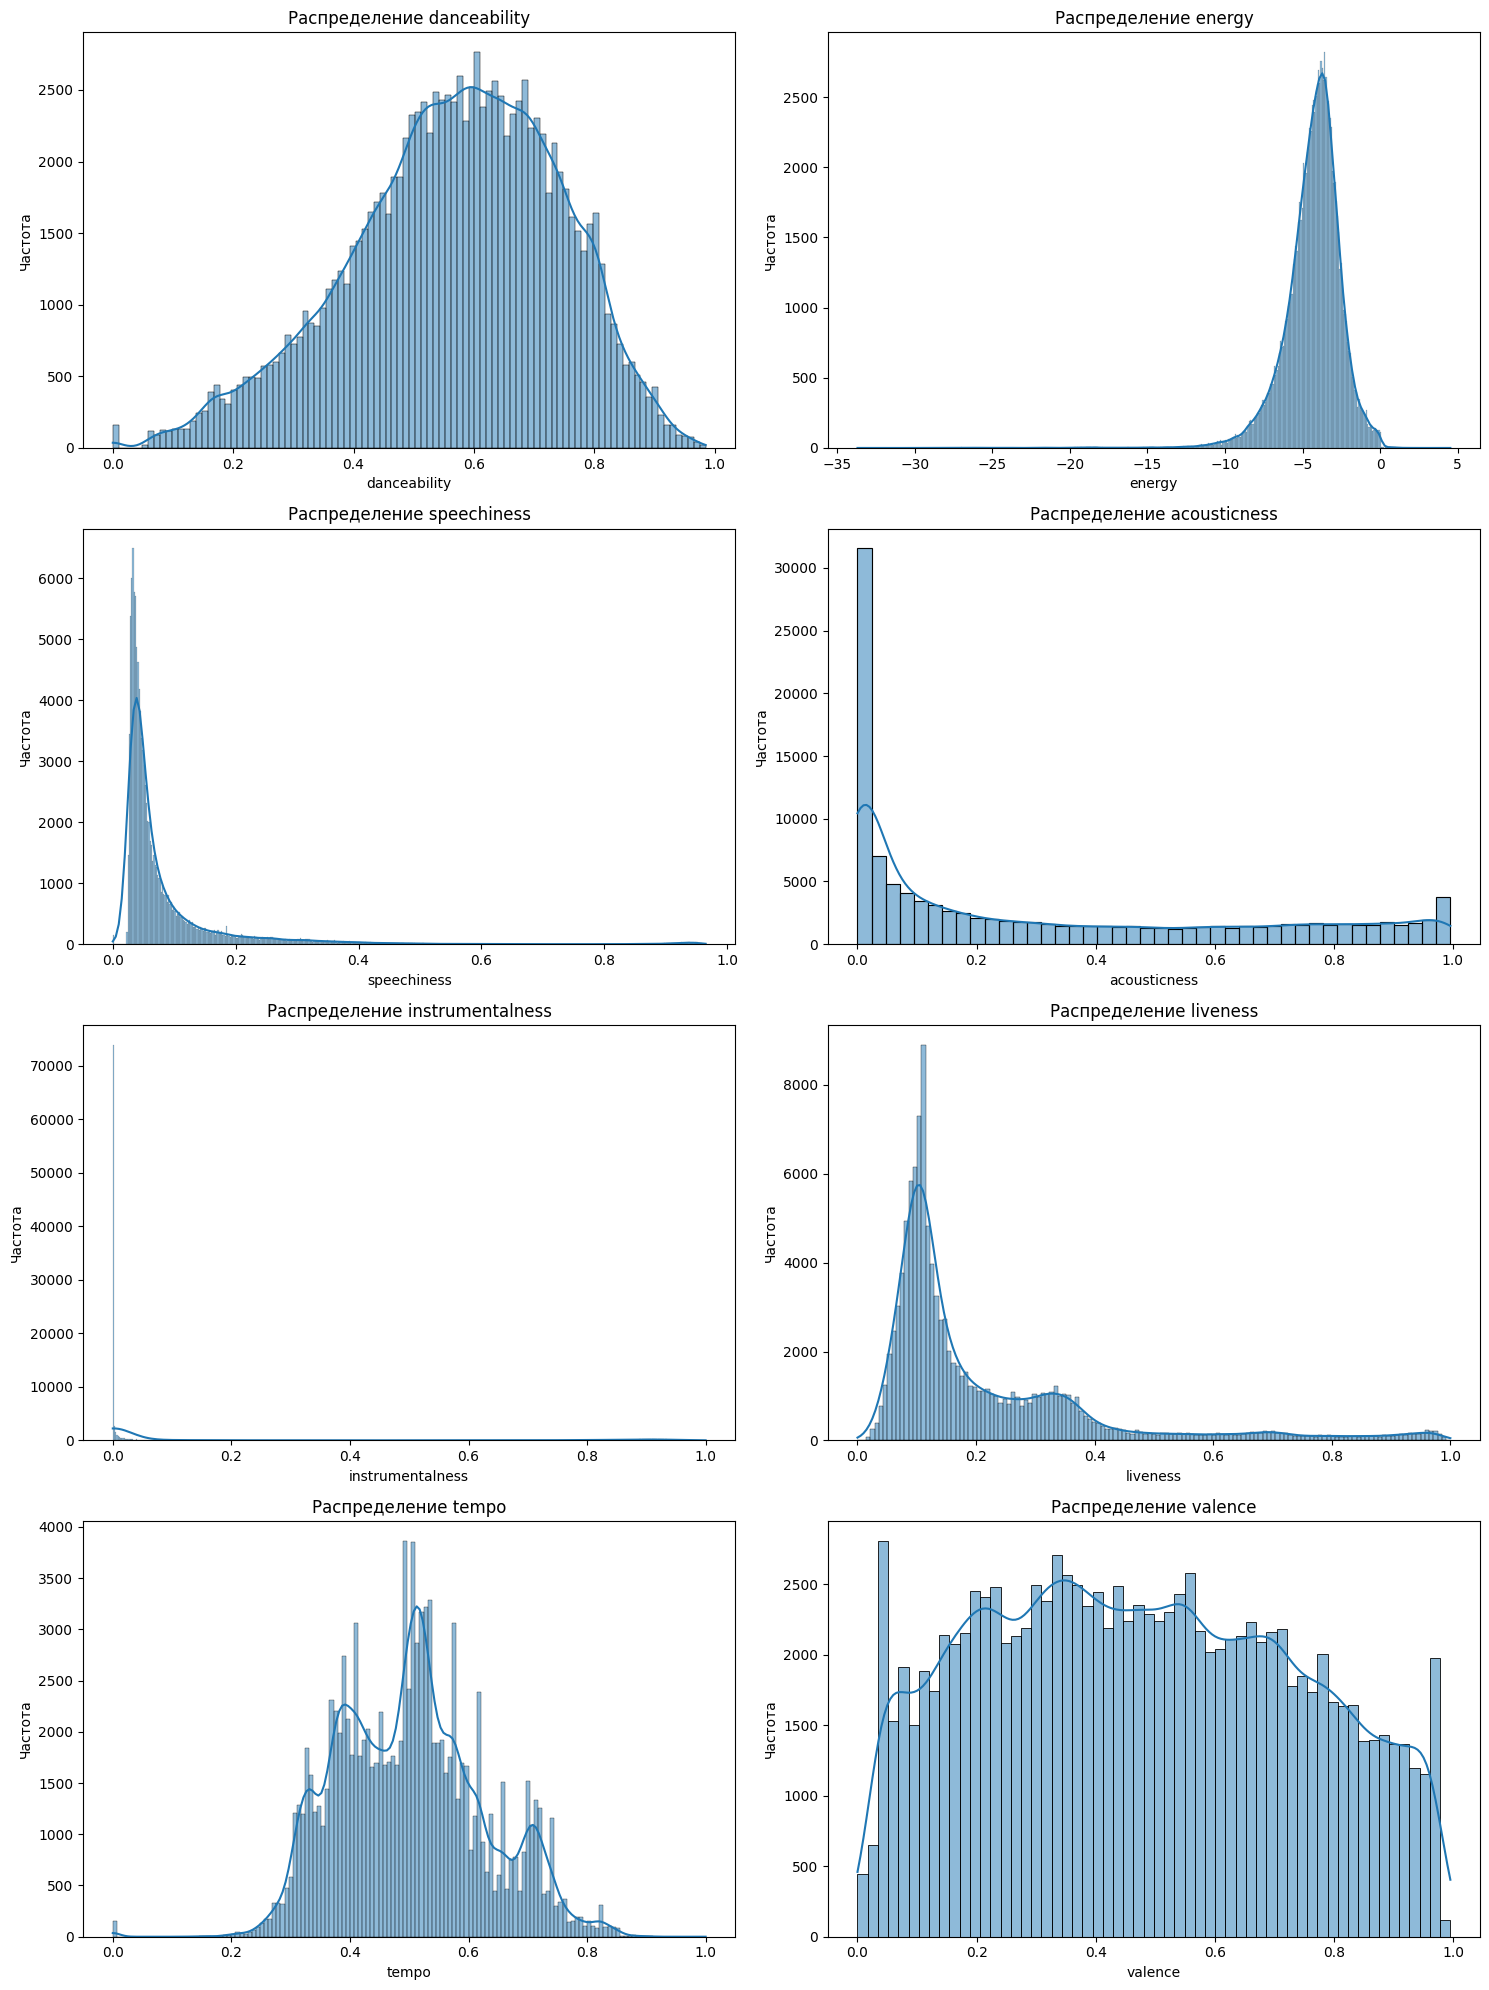

In [30]:
import warnings

warnings.filterwarnings("ignore")

columns = ['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'tempo', 'valence']

num_plots = len(columns)
num_cols = 2
num_rows = (num_plots + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
axes = axes.flatten()

for i, col in enumerate(columns):
    ax = axes[i]
    sns.histplot(df[col], ax=ax, kde=True)
    ax.set_title(f'Распределение {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Частота')


plt.tight_layout()
plt.show()

**Вывод**: Как можем заметить, значения в характеристиках danceability и energy, в основном, стремятся к 0.6 и -5 соответственно, в speechiness и acousticness они ближе к 0, liveness - к 0.1, в tempo, а особенно в valence, значения принимают почти все возможные варианты. И только в instrumentalness практически все равны 0. Имеет ли смысл данная колонка в таком случае, если все значения там практически одинаковы? Считаю, что нет, так как модель не получит почти ничего полезного. Предлагаю удалить ее. 

На основе этого и предыдущего (в прошлом разделе) Feature Engineering, предлагаю добавить колонки avg_tempo_per_min, acoustic_instrumental_ratio (чтобы не просто удалить instrumentalness, а все равно оставить ее), а также колонку, которая будет указывать, совместный ли это трек (2 и более исполнителей) или нет (соло).

In [31]:
df['avg_tempo_per_min'] = df['tempo'] / df['duration_min']

df['acoustic_instrumental_ratio'] = df['acousticness'] / (df['instrumentalness'] + 1e-8) # Добавляем 1e-8, чтобы не было деления на 0

# Для проверки, написан ли трек одним или несколькими исполнителями, скачаем новый датасет, так как в переменной df датасет
# без колонки artists.

temp_df = pd.read_csv('/kaggle/input/songsds/dataset.csv').dropna()
def check_names(artists):
    artists = artists.split(';') # Разделяем по ;, т.к. если несколько исполнителей, то они разделены именно этим знаком
    if len(artists) > 1:
        return 0
    return 1

df['is_solo'] = temp_df['artists'].apply(check_names)
df.head(15)


,artists,album_name,track_name,popularity,duration_min,explicit,danceability,energy,key,mode,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,avg_tempo_per_min,acoustic_instrumental_ratio,is_solo
0,10357,8100,11741,0.73,3.8,0,0.676,-3.109906,1,0,...,0.0322,0.000001,0.3580,0.7150,0.361245,4,0,0.095065,3.156863e+04,1
1,3287,14796,22528,0.55,2.5,0,0.420,-2.861010,1,1,...,0.9240,0.000006,0.1010,0.2670,0.318397,4,0,0.127359,1.658887e+05,1
2,12397,39162,60774,0.57,3.5,0,0.438,-3.494506,0,1,...,0.2100,0.000000,0.1170,0.1200,0.313643,4,0,0.089612,2.100000e+07,0
3,14839,8580,9580,0.71,3.4,0,0.266,-1.103494,0,1,...,0.9050,0.000071,0.1320,0.1430,0.746758,3,0,0.219635,1.279876e+04,1
4,5255,16899,25689,0.82,3.3,0,0.618,-4.288683,2,1,...,0.4690,0.000000,0.0829,0.1670,0.492863,4,0,0.149352,4.690000e+07,1
5,28649,9306,13744,0.58,3.6,0,0.688,-4.236167,6,1,...,0.2890,0.000000,0.1890,0.6660,0.402746,4,0,0.111874,2.890000e+07,1
6,204,18765,51044,0.74,3.8,0,0.407,-1.296834,2,1,...,0.8570,0.000003,0.0913,0.0765,0.580527,3,0,0.152770,2.955172e+05,0
7,12981,41972,27754,0.80,4.0,0,0.703,-4.142964,11,1,...,0.5590,0.000000,0.0973,0.7120,0.620285,4,0,0.155071,5.590000e+07,1
8,12982,41972,35274,0.74,3.2,0,0.625,-3.601800,0,1,...,0.2940,0.000000,0.1510,0.6690,0.534523,4,0,0.167039,2.940000e+07,0
9,23455,17349,26348,0.56,3.4,0,0.442,-4.278640,1,1,...,0.4260,0.004190,0.0735,0.1960,0.324191,4,0,0.095350,1.016704e+02,1


Отлично, теперь просто осталось дропнуть колонку instrumentalness

In [32]:
df = df.drop(['instrumentalness'], axis=1)

Теперь посмотрим корреляцию всех признаков, с учетом новых, с таргет-переменной.

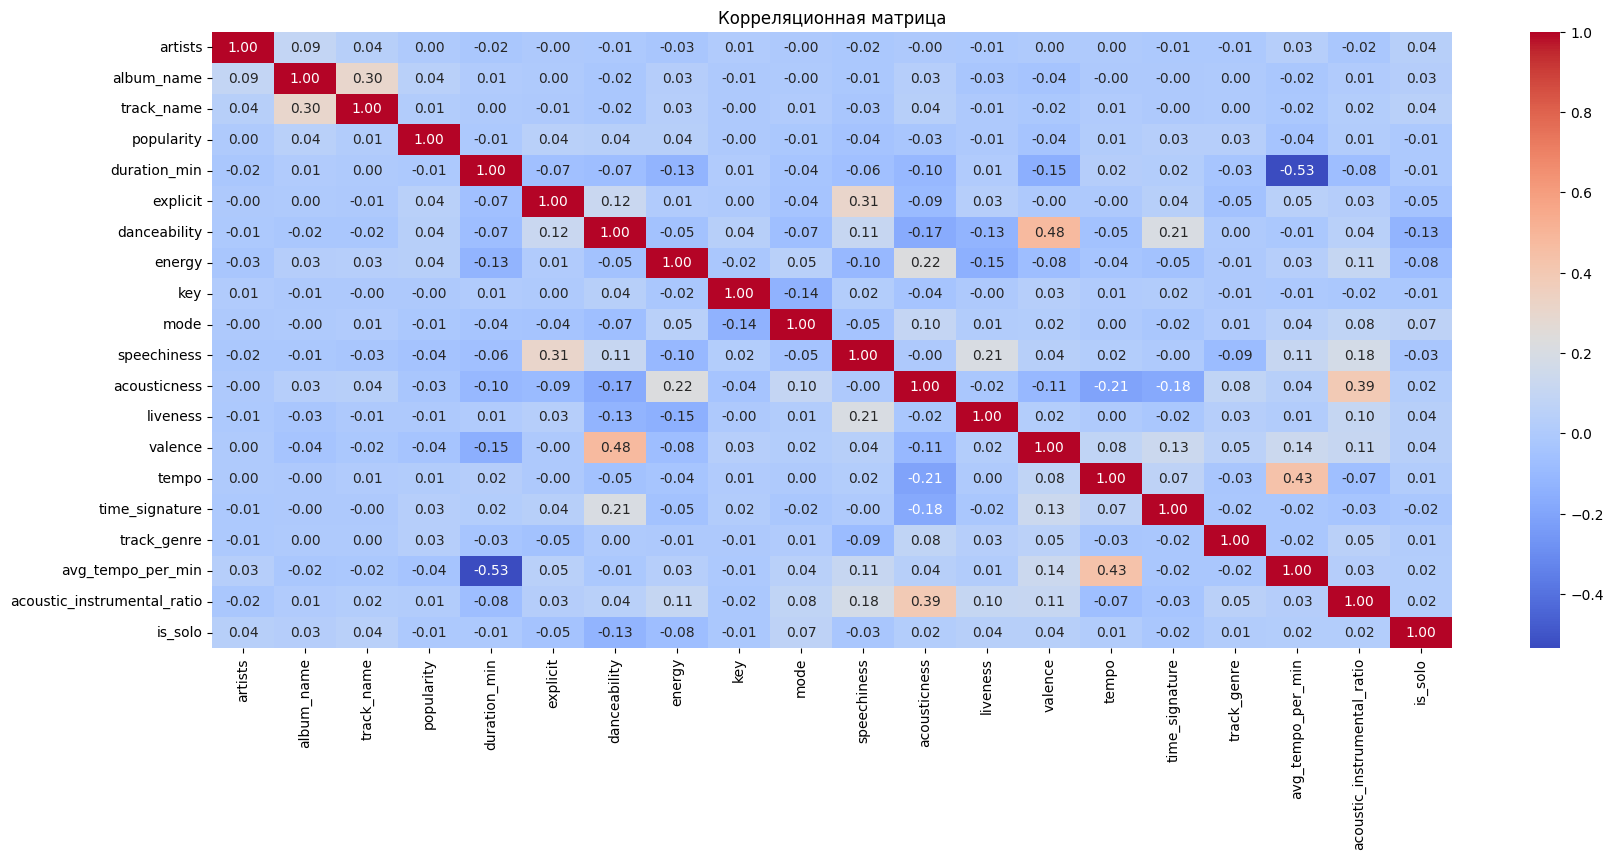

In [33]:
correlation_matrix = df.corr()

plt.figure(figsize=(20, 8)) 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Корреляционная матрица')
plt.show()

**ВЫВОД**: Как можем заметить, популярность не коррелирует ни с одним признаком. Все значения не больше 0.04. Возможно, связано с тем, что есть какие-то скрытые связи между целевой переменной и фичами. Это важно учитывать при оценке результатов моделей, так как из-за этого может быть тяжело предсказать популярность верно.

Теперь переходим к **выбору модели**.

Рассмотрим имеющийся датасет. По опыту прошлой лаборотной, некоторые модели справлялись лучше, если не использовать StandardScaler, другие - наоборот. Поэтому, предлагаю сохранить данный датасет, а в другую переменную сделать его нормализованную версию.

In [34]:
from sklearn.preprocessing import StandardScaler
non_scaled_ds = df
scaler = StandardScaler().fit(df)

scaled_df = pd.DataFrame(scaler.transform(df), columns=df.columns, index=df.index)

In [33]:
scaled_df

,artists,album_name,track_name,popularity,duration_min,explicit,danceability,energy,key,mode,speechiness,acousticness,liveness,valence,tempo,time_signature,track_genre,avg_tempo_per_min,acoustic_instrumental_ratio,is_solo
0,-0.594027,-1.074860,-1.180068,1.782624,-0.000281,-0.305769,0.629239,0.649219,-1.210434,-1.326297,0.551843,-0.850193,0.758735,0.929315,-1.141854,0.221824,-1.716914,-0.702149,-0.480799,0.598632
1,-1.372862,-0.576733,-0.664760,0.975625,-0.727178,-0.305769,-0.845908,0.781269,-1.210434,0.753979,-0.078995,1.831744,-0.591216,-0.798681,-1.489708,0.221824,-1.716914,-0.308752,-0.474938,0.598632
2,-0.369300,1.235896,1.162297,1.065291,-0.168026,-0.305769,-0.742187,0.445173,-1.491334,0.753979,-0.273827,-0.315489,-0.507172,-1.365679,-1.528303,0.221824,-1.716914,-0.768565,0.434046,-1.670476
3,-0.100287,-1.039152,-1.283301,1.692957,-0.223942,-0.305769,-1.733301,1.713706,-1.491334,0.753979,-0.457309,1.774605,-0.428381,-1.276965,1.987857,-2.089669,-1.716914,0.815313,-0.481618,0.598632
4,-1.156066,-0.420287,-0.513755,2.186123,-0.279857,-0.305769,0.295026,0.023829,-0.929534,0.753979,-0.303146,0.463409,-0.686290,-1.184394,-0.073343,0.221824,-1.716914,-0.040838,1.564053,0.598632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,0.742110,-1.672523,0.806640,-0.548707,1.453512,-0.305769,-2.274956,0.255319,-0.086833,0.753979,-0.401507,0.977663,-0.668431,-1.697779,0.128337,2.533318,1.716919,-0.874800,-0.482176,0.598632
113996,0.742110,-1.672523,1.368477,-0.503873,1.453512,-0.305769,-2.263432,1.162095,-1.491334,-1.326297,-0.421369,2.042258,-0.570205,-1.693536,-1.231186,0.221824,1.716919,-1.193546,-0.482176,0.598632
113997,-1.189445,-1.303391,0.084244,-0.503873,0.391125,-0.305769,0.358411,0.397451,-1.491334,-1.326297,-0.403399,1.660327,-0.681038,1.037314,0.341259,0.221824,1.716919,-0.387750,3.300512,0.598632
113998,0.306756,-1.138986,-0.713534,0.347959,0.502955,-0.305769,0.116395,-0.624044,0.474967,0.753979,-0.519731,0.198764,0.296495,-0.235539,0.460746,0.221824,1.716919,-0.412260,1.180113,0.598632


Разобьем оба датасета на трейн- и тест-выборки.

In [35]:
from sklearn.model_selection import train_test_split

X_non_scaled = non_scaled_ds.drop(['popularity'], axis=1)
y_non_scaled = non_scaled_ds['popularity']

X_scaled = scaled_df.drop(['popularity'], axis=1)
y_scaled = non_scaled_ds['popularity']

x_train_ns, x_test_ns, y_train_ns, y_test_ns = train_test_split(X_non_scaled, y_non_scaled, shuffle=True)
x_train_scaled, x_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y_scaled, shuffle=True)

Теперь, в процессе обучения моделей, будем обучать их на этих двух датасетах и сравнивать получившиеся результаты.

Что насчет моделей:
- Random Forest Regressor
- GradientBoostingRegressor
- LinearRegression
- Своя нейронная сеть


Рассмотрим отдельно каждую. Отмечу, что в прошлый раз на датасете Титаника SVM показала себя лучше всех, так как данных было мало. Сейчас же их довольно-таки много, из-за чего обучаться будет весьма долго, поэтому использовать ее не будем. Кросс-валидацию сделаем потом на самой лучшей модели.

- MAE - Средняя абсолютная ошибка представляет собой среднее значение абсолютной разницы между фактическими и прогнозируемыми значениями в наборе данных.
- MSE - Среднеквадратичная ошибка представляет собой среднее значение квадратичной разницы между исходными и прогнозируемыми значениями в наборе данных.
- RMSE - Среднеквадратичная ошибка - это квадратный корень из среднеквадратичной ошибки. Он измеряет стандартное отклонение остатков.
- R2 - Коэффициент детерминации или R-квадрат, представляющий собой долю дисперсии зависимой переменной, которая объясняется моделью линейной регрессии.


**Важно**! Все модели, которые импортируются из sklearn, в методе score возвращают именно R2-score. Следовательно, чем меньше значение, тем лучше. (https://scikit-learn.org/dev/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor.score:~:text=Return%20the%20coefficient%20of%20determination%20of%20the%20prediction.)

**Важно**! R-squared в этой работе я сокращаю как R2, R^2, R-squared. Это все одно и то же.

# Random Forest Regressor 

Параметры:
- **n_estimators**: Количество деревьев: 200.
- **criterion**: Критерий качества: среднеквадратичная ошибка (squared_error).
- **max_depth**: Максимальная глубина дерева: 20 (может привести к переобучению).
- **min_samples_split**: Мин. кол-во образцов для разделения узла: 15 (предотвращает переобучение).
- **min_samples_leaf**: Мин. кол-во образцов в листе: 10 (предотвращает переобучение).

Начнем с датасета без скейла.

In [62]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
regrfr = RandomForestRegressor(n_estimators=200, criterion='squared_error', max_depth=20, min_samples_split=15, min_samples_leaf=10, random_state=0)
regrfr.fit(x_train_ns, y_train_ns)
score_rfr = regrfr.score(x_test_ns, y_test_ns)
print(f'{score_rfr} - R2 score')

0.45070373770467176 - R2 score


Объясню выбор параметров. У нас очень большой датасет - 114000 строк. Следовательно, такие параметры, как n_estimators(количество деревьев) и max_depth(глубина) должны быть явно большими, ведь иначе модель просто недообучиться. min_samples_split и min_samples_leaf позволят модели не переобучиться, если мы указали глубину слишком большой. С этими же параметрами предлагаю обучить модель уже на датасете со скейлом.

In [63]:
regrfr_2 = RandomForestRegressor(n_estimators=200, criterion='squared_error', max_depth=20, min_samples_split=15, min_samples_leaf=10, random_state=0)
regrfr_2.fit(x_train_scaled,y_train_scaled)
score_rfr_2 = regrfr_2.score(x_test_scaled, y_test_scaled)
print(f'{score_rfr_2} - R2 score')

0.470505826287137 - R2 score


**Вывод**: Считаю, что разница в 2% незначительна. Проверим на других моделях, как они будут обучатся на нормализованном датасете и как на ненормализованном. Выводы будут в конце работы.

Построим график важности признаков

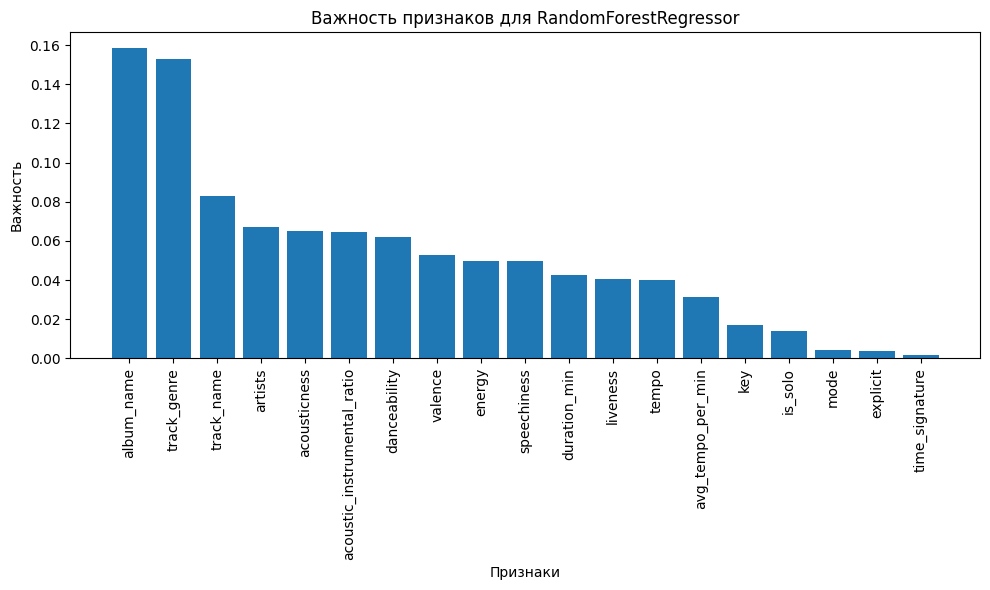

In [89]:
feature_importances = regrfr.feature_importances_
feature_names = x_train_ns.columns

# Сортировка значений важности признаков по убыванию
sorted_idx = np.argsort(feature_importances)[::-1]
sorted_feature_importances = feature_importances[sorted_idx]
sorted_feature_names = feature_names[sorted_idx]

# Построение графика важности признаков
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_feature_importances)), sorted_feature_importances)
plt.xticks(range(len(sorted_feature_importances)), sorted_feature_names, rotation=90)
plt.title("Важность признаков для RandomForestRegressor")
plt.xlabel("Признаки")
plt.ylabel("Важность")
plt.tight_layout()
plt.show()

**Вывод**: Можно заметить, что модель использует все признаки(даже несмотря на то, что некоторые очень мало).

# GradientBoostingRegressor

Параметры:
- **n_estimators**: Количество деревьев: 200.
- **learning_rate**: Скорость обучения: 0.1.
- **max_depth**: Максимальная глубина дерева: 15 (может привести к переобучению).
- **min_samples_split**: Мин. кол-во образцов для разделения узла: 15 (предотвращает переобучение).
- **min_samples_leaf**: Мин. кол-во образцов в листе: 10 (предотвращает переобучение).
- **random_state**: Seed для воспроизводимости результатов: 0.в: 0.

То же самое. Начнем с датасета без скейла.

In [90]:
from sklearn.ensemble import GradientBoostingRegressor
reggbr = GradientBoostingRegressor(n_estimators=200, 
                                   learning_rate=0.1, 
                                   max_depth=15, 
                                   min_samples_split=15, 
                                   min_samples_leaf=10, 
                                   random_state=0)
reggbr.fit(x_train_ns, y_train_ns)
score_gbr = reggbr.score(x_test_ns, y_test_ns)
print(f'{score_gbr} - R2 score')

0.6969130796660357 - R2 score


Выбор параметров аналогичен тому, как я выбирал их при обучении RandomForestRegressor.

Проверим модель на датасете со скейлом.

In [91]:
reggbr_2 = GradientBoostingRegressor(n_estimators=200, 
                                   learning_rate=0.1, 
                                   max_depth=15, 
                                   min_samples_split=15, 
                                   min_samples_leaf=10, 
                                   random_state=0)
reggbr_2.fit(x_train_scaled, y_train_scaled)
score_gbr_2 = reggbr_2.score(x_test_scaled, y_test_scaled)
print(f'{score_gbr_2} - R2 score')

0.6924776134976469 - R2 score


Получили приблизительно такую же точность, как и на датасете без склейла.

Построим график важности признаков

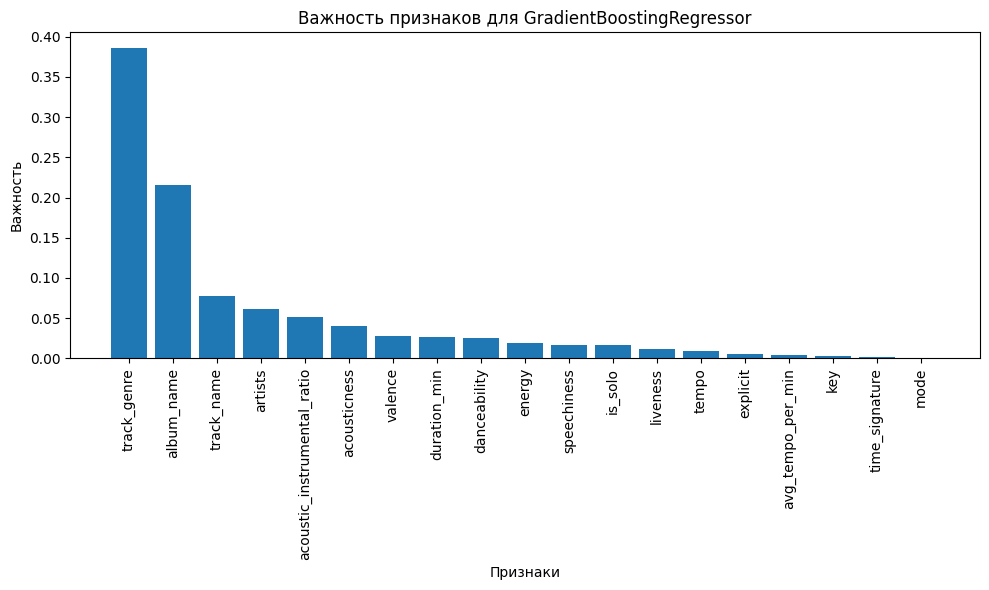

In [67]:
feature_importances = reggbr.feature_importances_

feature_names = x_train_ns.columns

# Сортировка значений важности признаков по убыванию
sorted_idx = np.argsort(feature_importances)[::-1]
sorted_feature_importances = feature_importances[sorted_idx]
sorted_feature_names = feature_names[sorted_idx]

# Построение графика важности признаков
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_feature_importances)), sorted_feature_importances)
plt.xticks(range(len(sorted_feature_importances)), sorted_feature_names, rotation=90)
plt.title("Важность признаков для GradientBoostingRegressor")
plt.xlabel("Признаки")
plt.ylabel("Важность")
plt.tight_layout()
plt.show()

**Вывод**: здесь модель использует практически все признаки, хотя стоит отметить, что большинство из них используются менее чем на 0.05.

# LinearRegression

Как я понял, параметров нет. Поэтому, запустим просто чистую модель сначала на не нормализованном датасете, а затем - на нормализованном.

In [68]:
import numpy as np
from sklearn.linear_model import LinearRegression
reglr = LinearRegression().fit(x_train_ns, y_train_ns)
score_lr = reglr.score(x_test_ns, y_test_ns)
print(f'{score_lr} - R2 score')

0.01854333517514395 - R2 score


In [69]:
reglr_2 = LinearRegression().fit(x_train_scaled, y_train_scaled)
score_lr_2 = reglr_2.score(x_test_scaled, y_test_scaled)
print(f'{score_lr_2} - R2 score')

0.01918862083825046 - R2 score


Самый обычный алгоритм линейной регрессии. Пока что показала худший результат.

# Своя нейронная сеть

Данных много, следовательно, если использовать модель с простой архитектурой, то она может переобучиться. Поэтому сразу же сделаем модель с большим количеством слоев. 

In [163]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.regularizers import l2
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(x_train_ns.shape[1],), kernel_regularizer=l2(0.01)))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(16, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(1))

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

history = model.fit(x_train_ns, y_train_ns, epochs=100, batch_size=8, validation_split=0.1, verbose=1,
          callbacks=[early_stopping])

loss, mae = model.evaluate(x_test_ns, y_test_ns)
print(f'Test MAE: {mae:.2f}')

Epoch 1/100
9619/9619 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - loss: 218235920.0000 - mae: 1708.4098 - val_loss: 15.9817 - val_mae: 2.8409
Epoch 2/100
9619/9619 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 91260.9531 - mae: 23.2264 - val_loss: 237.2295 - val_mae: 7.1826
Epoch 3/100
9619/9619 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 149995.2500 - mae: 15.7515 - val_loss: 1.9488 - val_mae: 0.3390
Epoch 4/100
9619/9619 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 6.6556 - mae: 0.5347 - val_loss: 1.4988 - val_mae: 0.1906
Epoch 5/100
9619/9619 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 1.3923 - mae: 0.1900 - val_loss: 0.8422 - val_mae: 0.1893
Epoch 6/100
9619/9619 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 0.6475 - mae: 0.1882 - val_loss: 0.1878 - val_mae: 0.1901
Epoch 7/100
9619/9619 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 0.1167 - mae: 0.1895 - val_loss: 0.0507 - val_mae: 0.1900
Epoch 8/100
9619/9619 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 0.0502 - mae: 0.1896 - val_loss: 0.0503 - val_mae: 0.1900

**Вывод**: Данная модель показала себя довольно неплохо. Средняя абсолютная ошибка равна 0.19, попробуем улучшить результаты модели. Для начала построим график потерь

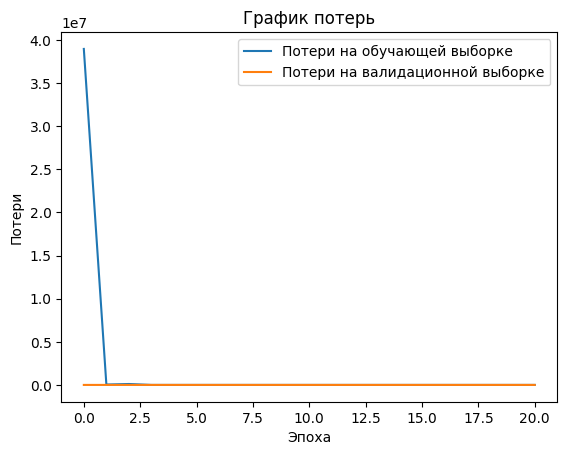

In [164]:
import numpy as np
import matplotlib.pyplot as plt

loss = history.history.get('loss')
val_loss = history.history.get('val_loss')

plt.title("График потерь")
plt.plot(loss, label="Потери на обучающей выборке")
plt.plot(val_loss, label="Потери на валидационной выборке")
plt.xlabel("Эпоха")
plt.ylabel("Потери")
plt.legend()
plt.show()

**Вывод**: Попробуем уменьшить начальный лосс, чтобы он не был таким огромным на старте. Добавим слои дропаута и увеличим количество слоев.

In [40]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.regularizers import l2
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(x_train_ns.shape[1],), kernel_regularizer=l2(0.01)))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.3))
model.add(Dense(16, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.3))
model.add(Dense(1))

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

history = model.fit(x_train_ns, y_train_ns, epochs=100, batch_size=8, validation_split=0.1, verbose=1,
          callbacks=[early_stopping])

loss, mae = model.evaluate(x_test_ns, y_test_ns)
print(f'Test MAE: {mae:.2f}')

Epoch 1/100
9619/9619 ━━━━━━━━━━━━━━━━━━━━ 38s 4ms/step - loss: 28799227904.0000 - mae: 25937.8125 - val_loss: 4576.4546 - val_mae: 29.6172
Epoch 2/100
9619/9619 ━━━━━━━━━━━━━━━━━━━━ 34s 4ms/step - loss: 4490670.5000 - mae: 307.3282 - val_loss: 6.7951 - val_mae: 0.3318
Epoch 3/100
9619/9619 ━━━━━━━━━━━━━━━━━━━━ 36s 4ms/step - loss: 94600.7969 - mae: 10.8964 - val_loss: 6.8235 - val_mae: 0.3289
Epoch 4/100
9619/9619 ━━━━━━━━━━━━━━━━━━━━ 35s 4ms/step - loss: 83609.6875 - mae: 3.9371 - val_loss: 7.0446 - val_mae: 0.3291
Epoch 5/100
9619/9619 ━━━━━━━━━━━━━━━━━━━━ 37s 4ms/step - loss: 112647.3516 - mae: 1.4536 - val_loss: 6.1796 - val_mae: 0.2946
Epoch 6/100
9619/9619 ━━━━━━━━━━━━━━━━━━━━ 37s 4ms/step - loss: 6332.5312 - mae: 0.7741 - val_loss: 3.0876 - val_mae: 0.2134
Epoch 7/100
9619/9619 ━━━━━━━━━━━━━━━━━━━━ 35s 4ms/step - loss: 1151.5354 - mae: 0.6390 - val_loss: 2.5826 - val_mae: 0.1969
Epoch 8/100
9619/9619 ━━━━━━━━━━━━━━━━━━━━ 35s 4ms/step - loss: 160.9950 - mae: 0.2517 - val_loss: 2

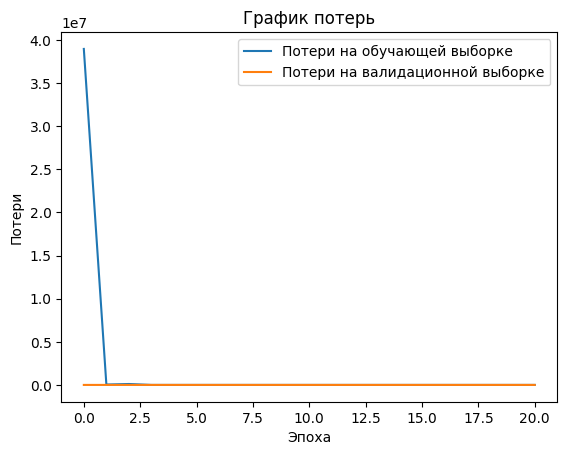

In [169]:
import numpy as np
import matplotlib.pyplot as plt

loss = history.history.get('loss')
val_loss = history.history.get('val_loss')

plt.title("График потерь")
plt.plot(loss, label="Потери на обучающей выборке")
plt.plot(val_loss, label="Потери на валидационной выборке")
plt.xlabel("Эпоха")
plt.ylabel("Потери")
plt.legend()
plt.show()

**Вывод:** ситуацию это не исправило. Видимо, происходит взрыв градиента. Попробуем уменьшить количество слоев, нейронов, l2 регуляризацию, оставим dropout, увеличим batch_size, а также добавим BatchNormalization. Patience уменьшим до 5, чтобы модель быстрее переставала обучаться, если потеря на валидации не меняется или начинает расти.

Почему такие изменения?
- Уменьшаем количество слоев и нейронов, так как, возможно, архитектура слишком сложная, и она недообучается.
- Уменьшаем l2, чтобы не так сильно штрафовать модель
- dropout оставляем для лучшего обобщения моделью
- batch size сделал больше, чтобы эпоха проходила быстрее
- BatchNormalization, чтобы модель была стабильнее.

In [170]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.regularizers import l2
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(x_train_ns.shape[1],), kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(1))

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

history = model.fit(x_train_ns, y_train_ns, epochs=100, batch_size=32, validation_split=0.1, verbose=1,
          callbacks=[early_stopping])

loss, mae = model.evaluate(x_test_ns, y_test_ns)
print(f'Test MAE: {mae:.2f}')


Epoch 1/100
2405/2405 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 0.5903 - mae: 0.4678 - val_loss: 0.1094 - val_mae: 0.1903
Epoch 2/100
2405/2405 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0996 - mae: 0.1886 - val_loss: 0.0724 - val_mae: 0.1891
Epoch 3/100
2405/2405 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0658 - mae: 0.1888 - val_loss: 0.0533 - val_mae: 0.1891
Epoch 4/100
2405/2405 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0518 - mae: 0.1878 - val_loss: 0.0508 - val_mae: 0.1867
Epoch 5/100
2405/2405 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0506 - mae: 0.1881 - val_loss: 0.0510 - val_mae: 0.1886
Epoch 6/100
2405/2405 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0506 - mae: 0.1887 - val_loss: 0.0508 - val_mae: 0.1885
Epoch 7/100
2405/2405 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0500 - mae: 0.1879 - val_loss: 0.0506 - val_mae: 0.1893
Epoch 8/100
2405/2405 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0497 - mae: 0.1878 - val_loss: 0.0504 - val_mae: 0.1890
Epoch 9/100
2405/2405 ━━━━━━━━━━

**Вывод:** Уже во время обучения можно заметить, что ситуация стала намного лучше. Лосс уже не скачет, а все время убывает. Построим график обучения модели.

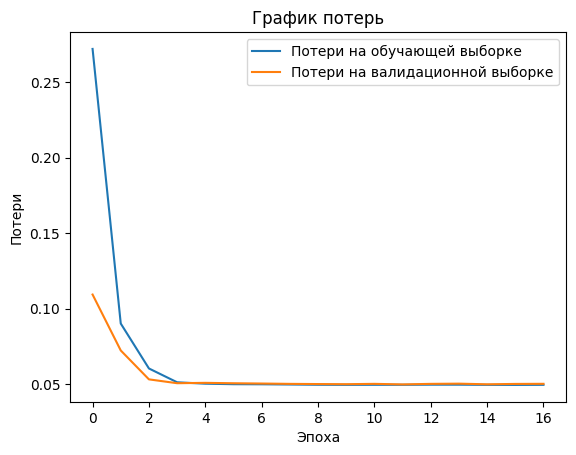

In [171]:
import numpy as np
import matplotlib.pyplot as plt

loss = history.history.get('loss')
val_loss = history.history.get('val_loss')

plt.title("График потерь")
plt.plot(loss, label="Потери на обучающей выборке")
plt.plot(val_loss, label="Потери на валидационной выборке")
plt.xlabel("Эпоха")
plt.ylabel("Потери")
plt.legend()
plt.show()

Как можем заметить, и график стал гораздо лучше. Модель все равно не улучшается после 3 эпохи (по крайней мере, значения не очень сильно меняются), однако уже стало выглядить лучше. На самом же графике заметно плато. Это свидетельствует о переобучении. Но, благодаря EarlyStopping, обучение завершилось.

Оставим последний вариант модели и попробуем обучить его на нормализованном датасете (до этого я обучал на обычном).

In [77]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.regularizers import l2
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(x_train_scaled.shape[1],), kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(1))

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

history = model.fit(x_train_scaled, y_train_scaled, epochs=100, batch_size=32, validation_split=0.1, verbose=1,
          callbacks=[early_stopping])

loss, accuracy = model.evaluate(x_test_scaled, y_test_scaled)
print(f'Test MAE: {accuracy:.2f}')

Epoch 1/100
2405/2405 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - loss: 0.5960 - mae: 0.4586 - val_loss: 0.1300 - val_mae: 0.1878
Epoch 2/100
2405/2405 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 0.1184 - mae: 0.1879 - val_loss: 0.0798 - val_mae: 0.1858
Epoch 3/100
2405/2405 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 0.0709 - mae: 0.1865 - val_loss: 0.0516 - val_mae: 0.1828
Epoch 4/100
2405/2405 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 0.0509 - mae: 0.1822 - val_loss: 0.0487 - val_mae: 0.1790
Epoch 5/100
2405/2405 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 0.0491 - mae: 0.1806 - val_loss: 0.0482 - val_mae: 0.1783
Epoch 6/100
2405/2405 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 0.0490 - mae: 0.1804 - val_loss: 0.0480 - val_mae: 0.1800
Epoch 7/100
2405/2405 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 0.0488 - mae: 0.1804 - val_loss: 0.0475 - val_mae: 0.1758
Epoch 8/100
2405/2405 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 0.0481 - mae: 0.1785 - val_loss: 0.0473 - val_mae: 0.1781
Epoch 9/100
2405/2405 ━━━━━━━━━

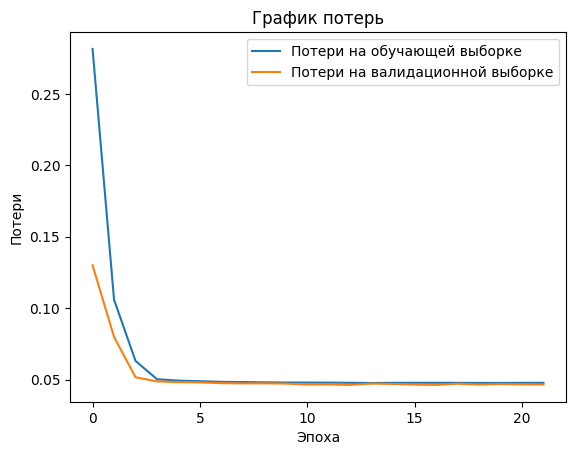

In [78]:
import numpy as np
import matplotlib.pyplot as plt

loss = history.history.get('loss')
val_loss = history.history.get('val_loss')

plt.title("График потерь")
plt.plot(loss, label="Потери на обучающей выборке")
plt.plot(val_loss, label="Потери на валидационной выборке")
plt.xlabel("Эпоха")
plt.ylabel("Потери")
plt.legend()
plt.show()

**Вывод**: MAE уменьшился, следовательно модель лучше обучается на нормализованном датасете, чем на ненормализованном. На самом же графике заметно плато. Это свидетельствует о переобучении. Но, благодаря EarlyStopping, обучение завершилось.

В общем, пока у меня нет идей, как улучшить данные показатели. Мне пока непонятно, использовать тут архитектуру сложнее или проще, точность почти не отличается. Улучшить точность удалось только когда поменял датасет без использования StandardScaler на стандартизированный датасет.

# Промежуточные результаты

Сравним точности GradientBoostingRegressor, RandomForestRegressor, LinearRegression с написанной моделью. Но для начала, посчитаем метрику R2 для нейронной сети (т.к. сейчас MAE).

In [73]:
from keras.models import Sequential
import tensorflow.keras.backend as K
from keras.layers import Dense, Dropout, BatchNormalization
from keras.regularizers import l2
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

def r2_score(y_true, y_pred):
    SS_res = K.sum(K.square(y_true - y_pred))
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return 1 - SS_res/(SS_tot + K.epsilon())

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(x_train_ns.shape[1],), kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(16, activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(1))

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mse', metrics=[r2_score])

history = model.fit(x_train_ns, y_train_ns, epochs=100, batch_size=32, validation_split=0.1, verbose=1,
          callbacks=[early_stopping])

loss, r2_score = model.evaluate(x_test_ns, y_test_ns)
print(f'Test Loss: {loss:.2f}')
print(f'Test R-squared: {r2_score:.2f}')


Epoch 1/100
2405/2405 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: 0.6590 - r2_score: -11.6969 - val_loss: 0.0883 - val_r2_score: -0.0296
Epoch 2/100
2405/2405 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 0.0828 - r2_score: -0.0366 - val_loss: 0.0643 - val_r2_score: -0.0293
Epoch 3/100
2405/2405 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.0608 - r2_score: -0.0333 - val_loss: 0.0511 - val_r2_score: -0.0267
Epoch 4/100
2405/2405 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.0511 - r2_score: -0.0323 - val_loss: 0.0491 - val_r2_score: -0.0230
Epoch 5/100
2405/2405 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.0501 - r2_score: -0.0309 - val_loss: 0.0492 - val_r2_score: -0.0255
Epoch 6/100
2405/2405 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.0499 - r2_score: -0.0309 - val_loss: 0.0489 - val_r2_score: -0.0225
Epoch 7/100
2405/2405 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.0497 - r2_score: -0.0266 - val_loss: 0.0488 - val_r2_score: -0.0227
Epoch 8/100
2405/2405 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.04

Получилось значение R^2 = -0.02. Интересный результат, который означает, что модель работает довольно-таки плохо. Попробую разобраться в том, из-за чего он получается такой. Попробуем убрать дропаут вообще, также уменьшим количество нейронов.

In [76]:
from keras.models import Sequential
import tensorflow.keras.backend as K
from keras.layers import Dense, Dropout, BatchNormalization
from keras.regularizers import l2
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

def r2_score(y_true, y_pred):
    SS_res = K.sum(K.square(y_true - y_pred))
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return 1 - SS_res/(SS_tot + K.epsilon())

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(x_train_ns.shape[1],), kernel_regularizer=l2(0.1)))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.1)))
model.add(BatchNormalization())
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.1)))
model.add(BatchNormalization())
model.add(Dense(1))

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mse', metrics=[r2_score])

history = model.fit(x_train_ns, y_train_ns, epochs=100, batch_size=32, validation_split=0.1, verbose=1,
          callbacks=[early_stopping])

loss, r2_score = model.evaluate(x_test_ns, y_test_ns)
print(f'Test Loss: {loss:.2f}')
print(f'Test R-squared: {r2_score:.2f}')

Epoch 1/100
2405/2405 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 2.4461 - r2_score: -1.3273 - val_loss: 0.0713 - val_r2_score: -0.2929
Epoch 2/100
2405/2405 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 0.0563 - r2_score: -0.0774 - val_loss: 0.0574 - val_r2_score: -0.1339
Epoch 3/100
2405/2405 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 0.0541 - r2_score: -0.0574 - val_loss: 0.0552 - val_r2_score: -0.1243
Epoch 4/100
2405/2405 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 0.0546 - r2_score: -0.0603 - val_loss: 0.0569 - val_r2_score: -0.1228
Epoch 5/100
2405/2405 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 0.0548 - r2_score: -0.0656 - val_loss: 0.1138 - val_r2_score: -1.4241
Epoch 6/100
2405/2405 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 0.0520 - r2_score: -0.0493 - val_loss: 0.5570 - val_r2_score: -11.0884
Epoch 7/100
1352/2405 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0516 - r2_score: -0.0512


KeyboardInterrupt



Прервем обучение, так как уже видно, что это не помогло. Последнее, что я проверю, это попробую обучить ее вновь на нормализованном датасете, а активацию заменить на leaky_relu.

In [79]:
from keras.models import Sequential
import tensorflow.keras.backend as K
from keras.layers import Dense, Dropout, BatchNormalization
from keras.regularizers import l2
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

def r2_score(y_true, y_pred):
    SS_res = K.sum(K.square(y_true - y_pred))
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return 1 - SS_res/(SS_tot + K.epsilon())

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model = Sequential()
model.add(Dense(32, activation='leaky_relu', input_shape=(x_train_ns.shape[1],), kernel_regularizer=l2(0.1)))
model.add(BatchNormalization())
model.add(Dense(64, activation='leaky_relu', kernel_regularizer=l2(0.1)))
model.add(BatchNormalization())
model.add(Dense(32, activation='leaky_relu', kernel_regularizer=l2(0.1)))
model.add(BatchNormalization())
model.add(Dense(1))

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mse', metrics=[r2_score])

history = model.fit(x_train_scaled, y_train_scaled, epochs=100, batch_size=32, validation_split=0.1, verbose=1,
          callbacks=[early_stopping])

loss, r2_score = model.evaluate(x_test_scaled, y_test_scaled)
print(f'Test Loss: {loss:.2f}')
print(f'Test R-squared: {r2_score:.2f}')

Epoch 1/100
2405/2405 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: 2.7047 - r2_score: -2.0578 - val_loss: 0.1150 - val_r2_score: -1.2777
Epoch 2/100
2405/2405 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.0574 - r2_score: -0.0695 - val_loss: 0.0583 - val_r2_score: -0.0909
Epoch 3/100
2405/2405 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.0581 - r2_score: -0.0712 - val_loss: 0.0909 - val_r2_score: -0.7635
Epoch 4/100
2405/2405 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.0563 - r2_score: -0.0546 - val_loss: 1.0250 - val_r2_score: -20.7274
Epoch 5/100
2405/2405 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 0.0556 - r2_score: -0.0532 - val_loss: 0.0852 - val_r2_score: -0.7254
Epoch 6/100
2405/2405 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 0.0538 - r2_score: -0.0426 - val_loss: 0.0528 - val_r2_score: -0.0523
Epoch 7/100
2405/2405 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 0.0522 - r2_score: -0.0311 - val_loss: 0.1393 - val_r2_score: -1.8968
Epoch 8/100
2405/2405 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 0.05

**Общий вывод по работе с моделями**: Как бы я не старался, у меня снова не получилось улучшить R2-score у нейронной сети на Keras. Не могу быть уверен в причинах того, что он получается меньше 0. Вроде как, никаких ошибок с датасетом нет, в формуле, как считается R2 тоже. Возможно, проблемы в самой архитектуре, но у меня кончились идеи, как ее еще изменить, так как, как мне кажется, я перепробовал все возможные варианты. 
Что касается моделей из Sklearn, то тут все, конечно, лучше. И GradientBoostingRegressor, и RandomForestRegressor показали довольно неплохие скоры, а LinearRegressor, как и ожидалось, показала худший скор, что, возможно, связано с тем, что датасет довольно сложный по структуре, этой модели тяжело найти принцип, по которому строится популярность у той или иной песни.
Так что, победителем в нашей "битве" моделей выходит GradientBoostingRegressor. Посмотрим на все метрики, которые я описал перед началом раздела про модели.

# GradientBoostingRegressor - победитель.

И так, посмотрим метрики (напомню, что модель записана под переменной **reggbr**)

In [84]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

y_pred = reggbr.predict(x_test_ns)

# Вычисляем метрики
mse = mean_squared_error(y_test_ns, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_ns, y_pred)
r2 = reggbr.score(x_test_ns, y_test_ns) 

print(f'R-squared: {r2:.4f}')
print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'MAE: {mae:.4f}')

R-squared: 0.6514
MSE: 0.0174
RMSE: 0.1319
MAE: 0.0969


Можем заметить неплохие значения, указывающие на то, что модель обучилась довольно-таки неплохо. Визуализируем данные для лучшего восприятия.

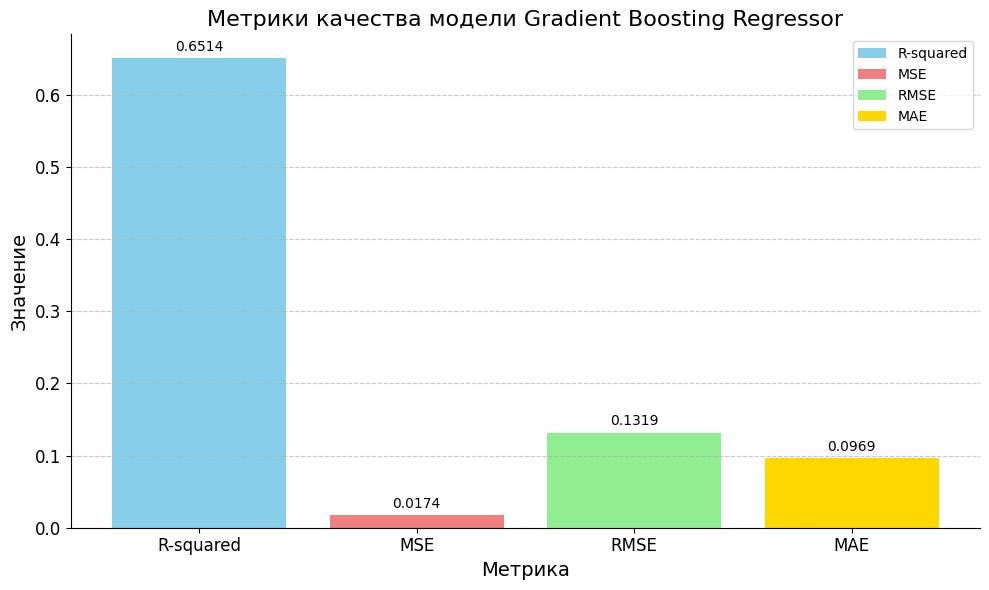

In [85]:
metrics = {'R-squared': r2, 'MSE': mse, 'RMSE': rmse, 'MAE': mae}

fig, ax = plt.subplots(figsize=(10, 6))

bars = ax.bar(metrics.keys(), metrics.values(), color=['skyblue', 'lightcoral', 'lightgreen', 'gold'])

ax.bar_label(bars, fmt='%.4f', padding=3)

ax.set_title('Метрики качества модели Gradient Boosting Regressor', fontsize=16)
ax.set_xlabel('Метрика', fontsize=14)
ax.set_ylabel('Значение', fontsize=14)

ax.grid(axis='y', linestyle='--', alpha=0.7)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='both', which='major', labelsize=12)

ax.legend(handles=bars, labels=metrics.keys())

plt.tight_layout()
plt.show()

Как я и говорил, проведем кросс-валидацию на лучшей модели - в данном случае GradientBoostingRegressor.

In [35]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt

reggbr = GradientBoostingRegressor(n_estimators=200, 
                                   learning_rate=0.1, 
                                   max_depth=15, 
                                   min_samples_split=15, 
                                   min_samples_leaf=10, 
                                   random_state=0)

kf = KFold(n_splits=5)

for fold_number, (train_index, test_index) in enumerate(kf.split(X_scaled), start=1):
    X_train, X_test = X_scaled.iloc[train_index], X_scaled.iloc[test_index]
    y_train, y_test = non_scaled_ds['popularity'].iloc[train_index], non_scaled_ds['popularity'].iloc[test_index]
    
    reggbr.fit(X_train, y_train)
    
    y_pred = reggbr.predict(X_test)

    # Вычисление метрик для текущего фолда
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = reggbr.score(X_test, y_test)
    
    print(f"Номер обхода: {fold_number}")
    print(f"MSE: {mse:.2f}")
    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R-squared: {r2:.2f}")



Номер обхода: 1
MSE: 0.04
MAE: 0.16
RMSE: 0.20
R-squared: 0.23
Номер обхода: 2
MSE: 0.03
MAE: 0.15
RMSE: 0.18
R-squared: 0.26
Номер обхода: 3
MSE: 0.05
MAE: 0.20
RMSE: 0.23
R-squared: 0.05
Номер обхода: 4
MSE: 0.05
MAE: 0.17
RMSE: 0.21
R-squared: 0.11
Номер обхода: 5
MSE: 0.04
MAE: 0.16
RMSE: 0.20
R-squared: 0.07


Результаты кросс-валидации не очень удовлетворительные. С одной стороны, я рад, что R2 ни упала ниже 0, с другой, в некоторых обходах она очень близка к 0, что означает, что модель справляется чуть лучше, чем просто предсказание среднего. Тем не менее, эта модель - лучший вариант из тех, которые есть. Остальные метрики не поднимались выше 0.23. Важно отметить, что кросс-валидацию я проводил на нормализованном датасете. Поэтому, как я понял, получились такие значения, так как в нормализованном датасете все значения маленькие. 
Предлагаю также визуализировать данные для лучшего восприятия.

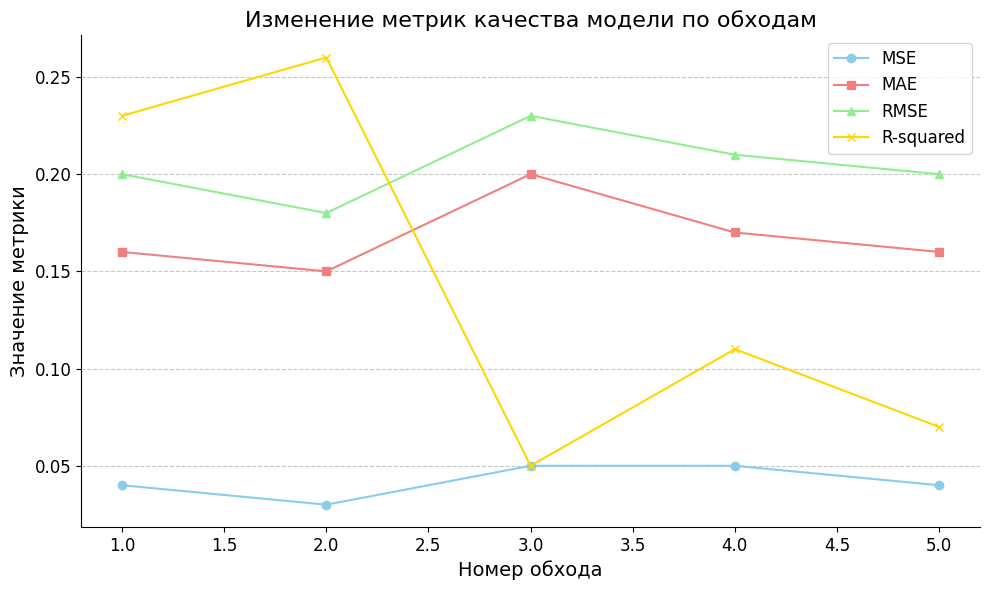

In [36]:
import matplotlib.pyplot as plt


iteration = [1, 2, 3, 4, 5]
mse = [0.04, 0.03, 0.05, 0.05, 0.04]
mae = [0.16, 0.15, 0.20, 0.17, 0.16]
rmse = [0.20, 0.18, 0.23, 0.21, 0.20]
r2 = [0.23, 0.26, 0.05, 0.11, 0.07]

plt.figure(figsize=(10, 6)) 

plt.plot(iteration, mse, marker='o', linestyle='-', label='MSE', color='skyblue')
plt.plot(iteration, mae, marker='s', linestyle='-', label='MAE', color='lightcoral')
plt.plot(iteration, rmse, marker='^', linestyle='-', label='RMSE', color='lightgreen')
plt.plot(iteration, r2, marker='x', linestyle='-', label='R-squared', color='gold')


plt.title('Изменение метрик качества модели по обходам', fontsize=16)
plt.xlabel('Номер обхода', fontsize=14)
plt.ylabel('Значение метрики', fontsize=14)

plt.legend(fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tick_params(axis='both', which='major', labelsize=12)

plt.tight_layout()
plt.show()


# Выводы

Перед выводами хочу заметить, что такие значения метрик (< 1, то есть, например MAE = 0.05, MSE = 0.2 и т.д.), связаны с тем, что я заменил значения в колонке popularity на "процентное" соотношение. То есть, я просто каждое значение делил на 100 - максимальное значение популярности. Следовательно, разница между предсказанными значениями и истинными относительно маленькая (то есть, например, предсказанное = 0.53, а истинное = 0.54, разность 0.1. Это меньше, чем если бы 53 и 54 и разность была бы 1.). Но относительно того, что все значения от 0 до 1, то разница 0.1 - достаточно большая ошибка.

**Общие выводы по работе:**
В ходе выполнения данной работы был проанализирован имеющийся датасет из 114000 строк, построены графики, которые показывают зависимости тех или иных фич, а также были добавлены новые: avg_tempo_per_min(отношение темпа к длительности трека), acoustic_instrumental_ratio (отношение параметра acoustic к параметру instrumentalness) и is_solo (была ли песня исполнена в одиночку или нет). Среди интересных замечаний хотелось бы выделить то, что песни с explicit-контентом имеют меньшую популярность по отношению к тем, в которых не содержится откровенный контент.

**Выводы по моделям машинного обучения:**
Для предсказания таргетной переменной - popularity, я обучил 4 модели - RandomForestRegressor, GradientBoostingRegressor, LinearRegression и нейронную сеть на Keras. Победителем стала GradientBoostingRegressor, показавшая наибольший R-squared скор среди других. Все эти 4 модели объединяет одно - для более лучшего обучения необходимо построить (в случае Keras) или подобрать такие параметры (в случае всех остальных), чтобы модель смогла хорошо обучиться на таком большом датасете. Именно это я и пытался сделать во время тюнинга параметров моделей. Более чем уверен, что если продолжить настраивать параметры, например, GradientBoostingRegressor, то можно получить результат лучше. Также не стоит забывать, что все фичи не коррелируют с таргет-переменной, это тоже одна из причин таких результатов моделей.

**Выводы про датасеты - нормализованный и нет:**
В ходе работы я несколько раз писал, что разницы между ними нет - модели имеют практически одинаковый скор что на нормализованном, что на ненормализованном датасете. Однако я, прочитав больше информации в интернете, хочу уточнить, что разница есть. Она заключается в том, что благодаря нормализации датасета становится меньше выбросов данных, следовательно, модель, обученная на таком датасете, работает более стабильно, так как менее чувствительна к выбросам. В этом и заключается главный плюс нормализованного датасета.

**Вывод про нейронную сеть на Keras:**
К сожалению, у меня так и не получилось улучшить R2 скор этой модели. Как бы я не менял архитектуру, все равно он остается таким же. Я честно не представляю, с чем может быть связана такая проблема. У меня были предположения, начиная с того, что я мог неправильно указать датасеты для обучения, заканчивая тем, что в слоях указал не ту функцию активации. Однако они не подтвердились.

Таким образом, я в целом доволен результатами проделанной мной работы, однако, конечно, хотелось бы улучшить модель на Keras, чтобы она тоже могла неплохо предсказывать популярность.




# Доработка модели GradientBoostingRegressor

Увеличил глубину до 20, min_samples_leaf увеличил до 15.

In [37]:
reggbr_3 = GradientBoostingRegressor(n_estimators=200, 
                                   learning_rate=0.1, 
                                   max_depth=20, 
                                   min_samples_split=15, 
                                   min_samples_leaf=15, 
                                   random_state=0)
reggbr_3.fit(x_train_ns, y_train_ns)
score_gbr = reggbr_3.score(x_test_ns, y_test_ns)
print(f'{score_gbr} - R2 score')

0.6896744147173441 - R2 score


Результат не сильно улучшился (на 3%). Попробуем увеличить количество деревьев до 300, min_samples_split и min_samples_leaf до 20.

In [38]:
reggbr_4 = GradientBoostingRegressor(n_estimators=300, 
                                   learning_rate=0.1, 
                                   max_depth=20, 
                                   min_samples_split=20, 
                                   min_samples_leaf=20, 
                                   random_state=0)
reggbr_4.fit(x_train_ns, y_train_ns)
score_gbr = reggbr_4.score(x_test_ns, y_test_ns)
print(f'{score_gbr} - R2 score')

0.7016185862357143 - R2 score


Получили скор 0.7.  Это, пока что, лучший результат. В общем, можно заметить, что при увеличении глубины модели и количества деревьев, результат становится лучше. Следовательно, могу предположить, что можно еще сильнее улучшить результат, если увеличить эти параметры. Также не стоит забывать и про параметры min_samples_split и min_samples_leaf, которые сделают модель стабильнее.
                                   

# Дополнение. Удаление всех 0 из колонки popularity и обучение GradientBoostingRegressor

Проверим колонку popularity. Посчитаем количество нулей.

In [36]:
popularity_0 = non_scaled_ds[non_scaled_ds['popularity'] == 0]
len(popularity_0)

16019

Как можно заметить, таких значений 16019. Это больше 10% датасета. Удалим их и обучим модель.

In [38]:
new_df = non_scaled_ds[non_scaled_ds['popularity'] != 0]

97980

Создаем трейн и тест выборки

In [39]:
new_X = new_df.drop(['popularity'], axis=1)
new_y = new_df['popularity']

x_train_new, x_test_new, y_train_new, y_test_new = train_test_split(new_X, new_y, shuffle=True)

Обучаем GradientBoostingRegressor с лучшими параметрами (которые мы подбирали выше) на этих выборках

In [41]:
from sklearn.ensemble import GradientBoostingRegressor  # Еще раз импортирую, так как перезапускал блокнот

reggbr_5 = GradientBoostingRegressor(n_estimators=300, 
                                   learning_rate=0.1, 
                                   max_depth=20, 
                                   min_samples_split=20, 
                                   min_samples_leaf=20, 
                                   random_state=0)
reggbr_5.fit(x_train_new, y_train_new)
score_gbr = reggbr_5.score(x_test_new, y_test_new)
print(f'{score_gbr} - R2 score')

0.6497109969393695 - R2 score


**Вывод:** можем заметить, что скор, в целом, несильно отличается от того, который был на изначальном датасете. Возможно, в данном случае просто повезло с выборкой, и значения могли бы быть хуже (ведь, как никак, мы удалили 10% от данных, а что если, например, в этих данных очень много песен одного жанра? Получается, из-за такого изменения, их будет мало в датасете, что может повлиять на точность модели, проверим это чуть позже). В общем, предлагаю еще посмотреть на важность признаков.

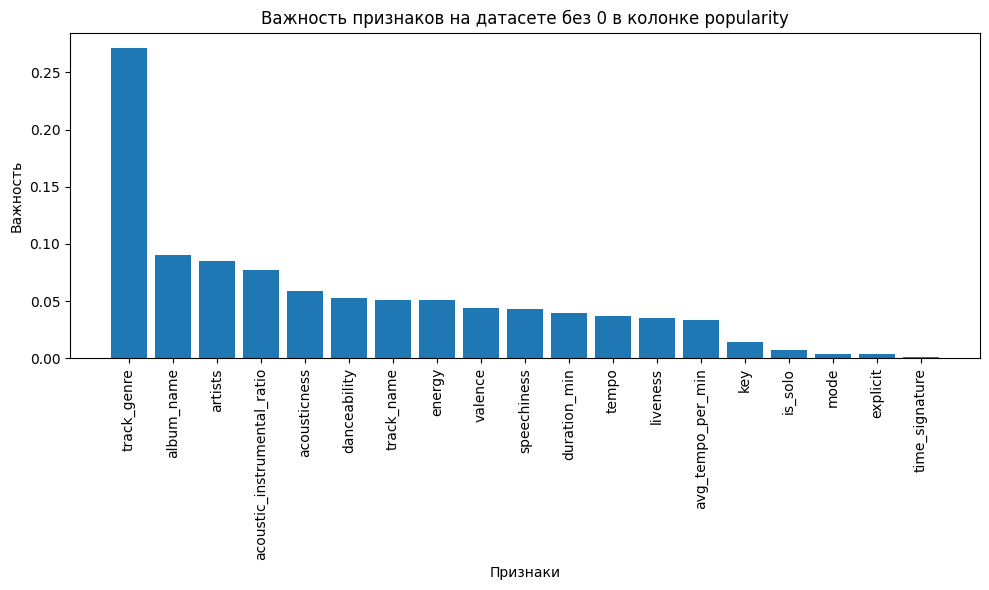

In [42]:
feature_importances = reggbr_5.feature_importances_

feature_names = x_train_new.columns

# Сортировка значений важности признаков по убыванию
sorted_idx = np.argsort(feature_importances)[::-1]
sorted_feature_importances = feature_importances[sorted_idx]
sorted_feature_names = feature_names[sorted_idx]

# Построение графика важности признаков
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_feature_importances)), sorted_feature_importances)
plt.xticks(range(len(sorted_feature_importances)), sorted_feature_names, rotation=90)
plt.title("Важность признаков на датасете без 0 в колонке popularity")
plt.xlabel("Признаки")
plt.ylabel("Важность")
plt.tight_layout()
plt.show()

**Вывод**: на первых двух местах все так же track_genre и album_name. В остальном, есть незначительные отличия (например, мой признак acoustic_instrumenta_ratio поменялся на 4 месте (а на графике, где была важность признаков на исходном датасете, он был на 5), но я думаю, это не очень важно.

А теперь проверим мою гипотезу, которую я описал чуть выше (...а что если, например, в этих данных очень много песен одного жанра? Получается, из-за такого изменения, их будет мало в датасете, что может повлиять на точность модели...). Реализуем это и построим график

Количество песен с популярностью 0 по жанрам:
 track_genre
jazz              681
iranian           656
romance           636
soul              611
latin             588
                 ... 
heavy-metal         2
j-idol              2
sertanejo           1
detroit-techno      1
club                1
Name: count, Length: 111, dtype: int64


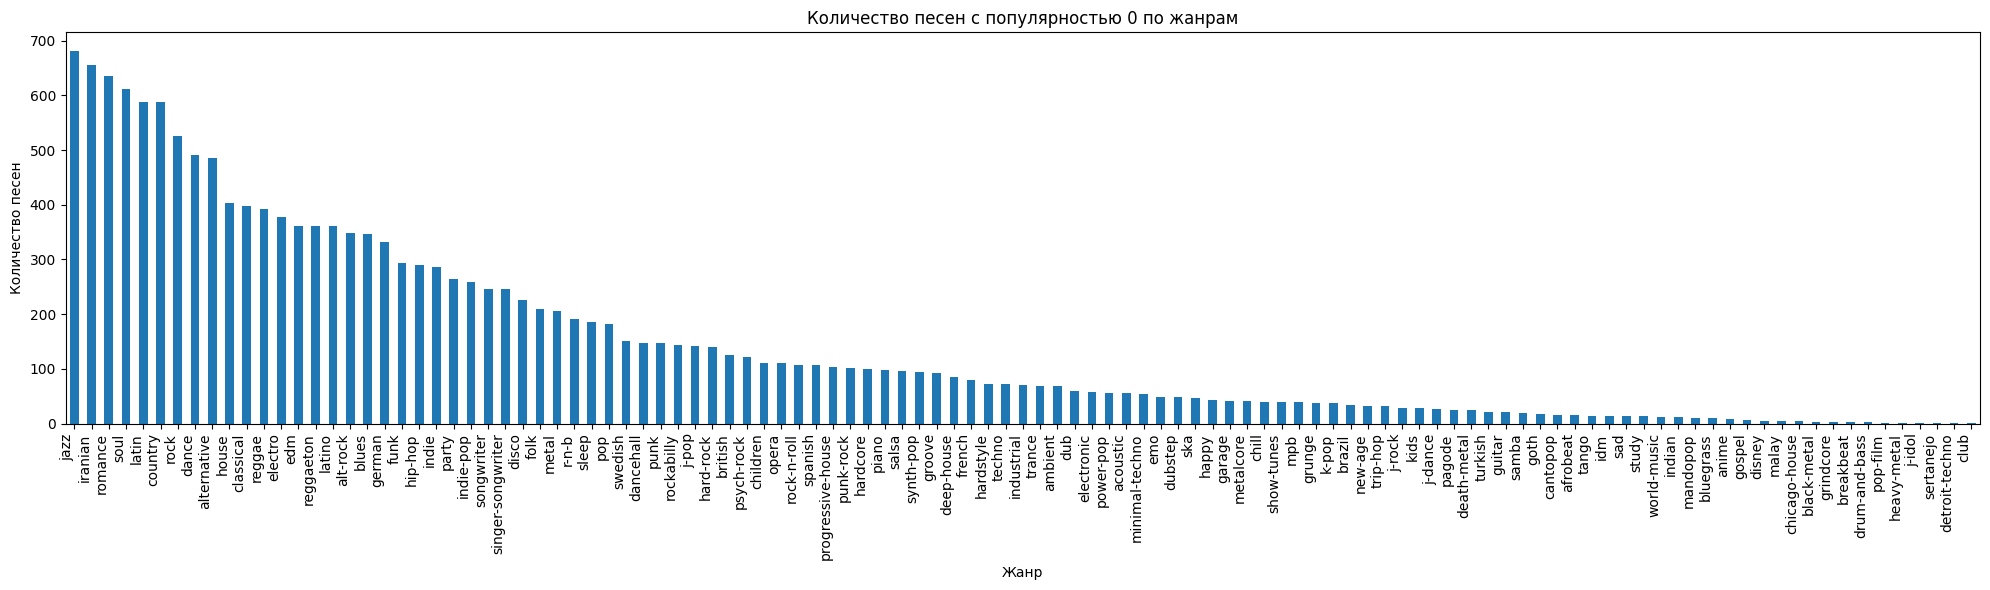

In [54]:
popularity_0 = temp_df[temp_df['popularity'] == 0]

genre_counts = popularity_0['track_genre'].value_counts()

# Вывод количества песен
print("Количество песен с популярностью 0 по жанрам:\n", genre_counts)

plt.figure(figsize=(20, 6)) 
genre_counts.plot(kind='bar')
plt.title('Количество песен с популярностью 0 по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Количество песен')
plt.xticks(rotation=90, ha='right') 
plt.tight_layout() 
plt.show()

**Вывод**: Можем заметить, что в первых 7 жанрах, как минимум 500 песен, которые имеют популярность ноль. Да и в целом очень много жанров, у которых количество песен с нулевой популярностью более 100. Удаление 0 из колонки popuarity приводит к тому, что какие-то жанры будут представлены больше, чем другие, следовательно модели может быть тяжелее предсказывать популярность для менее представленных жанров. Поэтому, нельзя однозначно сказать, пойдет на пользу удаление 0 или нет. Тем более, что скор модели на таком датасете не отличается от того скора, который был на первоначальном датасете.